Resizing the output box

from IPython.display import Javascript
def resize_colab_cell():
    display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

# Business Case: Netflix - Data Exploration and Visualisation

### Problem Statement
Analyze the data to recommend Netflix the kind of shows and movies to produce, where and when to produce/release them so as to grow the business.
#### Assumption:
There are no details provided in the data to obtain enagement or monetory trends, so have made a prior assumption that whatever information we gain from the data, is in sync with what Netflix  will work for Netflix in future. Accordingly recommendations are made.

##  <span style="color:blue">Importing libraries for analysis</span>
#### Libraries
    1. Library pandas will be required to work with data in tabular representation.
    2. Library numpy will be required to round the data in the correlation matrix.
    3. Library matplotlib, seaborn, plotly required for data visualization.
    4. Library missingno will be required to visualize missing values in the data.
    5. Library warnings to disable any FurtureWarning in the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import missingno
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = FutureWarning)

## <span style="color:blue">Reading the data</span>

In [2]:
df = pd.read_csv(r"https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

## <span style="color:blue">Data Description</span>


### 3.1 The Dimensions Of The Data

In [3]:
print(f'\nThe Data-Set Contain \033[1m{df.shape[0]} Rows\033[0m and\033[1m {df.shape[1]} Columns\033[0m.')


The Data-Set Contain 8807 Rows and 12 Columns.


### 3.2 Fetching top twenty rows from the dataframe df to get a view of data imported

In [4]:
df.head(10)

show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                        director  \
0                Kirsten Johnson   
1                            NaN   
2                Julien Leclercq   
3                            NaN   
4                            NaN   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
8                Andy Devonshire   
9                 Theodore Melfi   

                                                cast  \
0                                                NaN   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                                NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...   
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9  Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   

                                             country          date_added  \
0                                      United States  September 25, 2021   
1                                       South Africa  September 24, 2021   
2                                                NaN  September 24, 2021   
3                                                NaN  September 24, 2021   
4                                              India  September 24, 2021   
5                                                NaN  September 24, 2021   
6                                                NaN  September 24, 2021   
7  United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                     United Kingdom  September 24, 2021   
9                                      United States  September 24, 2021   

   release_year rating   duration  \
0          2020  PG-13     90 min   
1          2021  TV-MA  2 Seasons   
2          2021  TV-MA   1 Season   
3          2021  TV-MA   1 Season   
4          2021  TV-MA  2 Seasons   
5          2021  TV-MA   1 Season   
6          2021     PG     91 min   
7          1993  TV-MA    125 min   
8          2021  TV-14  9 Seasons   
9          2021  PG-13    104 min   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   
5                 TV Dramas, TV Horror, TV Mysteries   
6                           Children & Family Movies   
7   Dramas, Independent Movies, International Movies   
8                       British TV Shows, Reality TV   
9                                   Comedies, Dramas   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...  
5  The arrival of a charismatic young priest brin...  
6  Equestria's divided. But a bright-eyed hero be...  
7  On a photo shoot in Ghana, an American model s...  
8  A talented 

<B>Initial observations from the data.</B>
1. The data has <B>some columns with NaN values</B>. Need to either replace them with appropriate values, or drop the rows/columns altogether.
2. <B>Columns like director, cast, country and listed_in</B> have multiple <B>values separated by comma</B>. We will need to unnest these multi-value columns.

### 3.3 Columns in the dataset

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Feature description:

     1 Show_id: Unique ID for every Movie / Tv Show
     2 Type: Identifier - A Movie or TV Show
     3 Title: Title of the Movie / Tv Show
     4 Director: Director of the Movie
     5 Cast: Actors involved in the movie/show
     6 Country: Country where the movie/show was produced
     7 Date_added: Date it was added on Netflix
     8 Release_year: Actual Release year of the movie/show
     9 Rating: TV Rating of the movie/show    
    10 Duration: Total Duration - in minutes or number of seasons
    11 Listed_in: Genre
    12 Description: The summary description
    
<B>Renaming</B> the column <B>listed_in</B> to <B>genre</B> for more clarity

In [6]:
# Renaming the column listed_in to clarity
df.rename(columns = {'listed_in':'genre'}, inplace = True)
df.head(1)

show_id   type                 title         director cast        country  \
0      s1  Movie  Dick Johnson Is Dead  Kirsten Johnson  NaN  United States   

           date_added  release_year rating duration          genre  \
0  September 25, 2021          2020  PG-13   90 min  Documentaries   

                                         description  
0  As her father nears the end of his life, filmm...

### 3.4 Information about the dataframe    

In [7]:
print("\n\033[1mSize of the original dataset :\033[0m",df.size)
print()

print("\033[1mInformation provided in the original dataset :\033[0m")
print()
print(df.info())


Size of the original dataset : 105684

Information provided in the original dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  genre         8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


<B>Initial observations from the data.</B>
1. <B>Majority of the columns</B> have data type as <B>string/object</B> 
2. Only column <B>release_year</B>, has <B>numeric value</B>
3. The data type of column <B>date_added</B> is <B>not datetime</B>

In [8]:
print('\n\033[1mTotal Unique values corresponding to each column: \033[0m')
df.nunique()


Total Unique values corresponding to each column: 


show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
genre            514
description     8775
dtype: int64

In [9]:
# Statistical description on the dataframe - column Release Year(only numeric value)
print('\n\033[1mStatistical description on the dataframe: \033[0m \n\n',df.describe())


Statistical description on the dataframe:  

        release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


<B>Insights :</B>
    The data captured in the dataset for <B>released year</B> is from <B>1925-2021.</B>
    
## <span style="color:blue">Information about NAN(not a number)/NULL and Duplicate values in the dataset</span>    

In [10]:
print('\n\033[1mThe total count of Null values: \033[0m',df.isnull().sum().sum())
print('\n\033[1mSeggregation of Null values: \033[0m\n')
print(df.isnull().sum())
print('\n\033[1mNumber of Null values in the dataset are: \033[0m',df.duplicated().sum())


The total count of Null values:  4307

Seggregation of Null values: 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
genre              0
description        0
dtype: int64

Number of Null values in the dataset are:  0


<B>Initial observations from the data.</B>
1. Only few rows in date_added, rating and duration columns have null
2. There are no duplicated rows

## <span style="color:blue">Analysis of missing values in the dataset</span>



### 7.1 Getting summary of missing value percentage

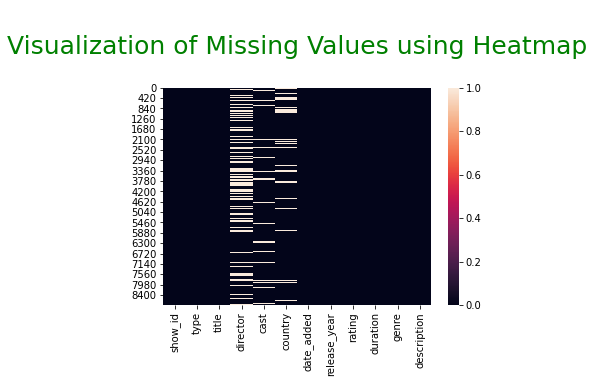

In [11]:
# Visualization of Missing Values using Heatmap
sns.heatmap(df.isnull())
plt.title("\nVisualization of Missing Values using Heatmap\n",fontsize=25,color="green")
plt.show()

<B>Observation :</B>  

 - The above distribution helps in visualizing that <B>maximun values</B> are missed under the <B>attribute Director followed by Country and then Cast</B>. 

In [12]:
print("\n\033[1mSummary of missing value in percentage is as below:\033[0m\n")
print("\033[1mColumn\033[0m".ljust(19),"\033[1mData Availability\033[0m")
for column in df.columns:
    print(f"{column}:".ljust(20),f"{round(len(df[~df[column].isnull()])*100/len(df[column]), 2)}%")


Summary of missing value in percentage is as below:

Column      Data Availability
show_id:             100.0%
type:                100.0%
title:               100.0%
director:            70.09%
cast:                90.63%
country:             90.56%
date_added:          99.89%
release_year:        100.0%
rating:              99.95%
duration:            99.97%
genre:               100.0%
description:         100.0%


<B>Initial observations from the data.</B>
1. The data has <B>some columns with NaN values</B>. Need to either replace them with appropriate values, or drop the rows/columns altogether.
2. <B>Columns like director, cast, country and listed_in</B> have multiple <B>values separated by comma</B>. We will need to unnest these multi-value columns.
3. Only <B>few rows in date_added, rating and duration columns</B> have <B> null</B>.  

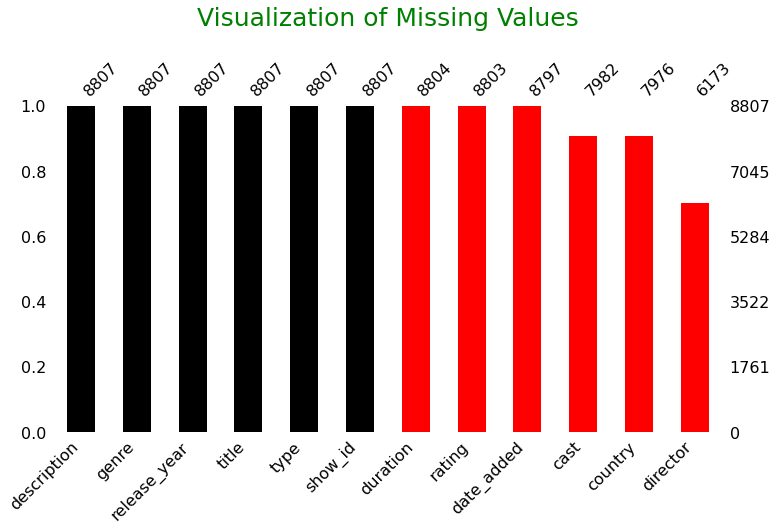

In [13]:
# Visualization of Missing Values
color = ['black','black','black','black','black','black','red','red','red','red','red','red']
missingno.bar(df,fontsize =16, color = color, sort = 'descending', figsize = (12,6))
plt.title("Visualization of Missing Values\n",fontsize=25,color="green")
print()
plt.show()

### 7.2 Filling up missing values
<B>Date_added, rating and Duration</B> columns have <B>NULL Values with less than 0.5% of records, so <B>removing them</B>.

In [14]:
df = df.loc[~df['date_added'].isnull()] # Date_added column
df = df.loc[~df['rating'].isnull()]     # Rating column
df = df.loc[~df['duration'].isnull()]   # Duration column

<B>Filling rest of the missing values with string "Unknown"</B> as each movie is entirely different and filling wrong values can be a problem

In [15]:
# fill NAN values with unknow
df["director"].fillna(value="Unknown", inplace=True)
df["cast"].fillna(value="Unknown", inplace=True)
df["country"].fillna(value="Unknown",inplace=True)

<B>Cross checking for any null values in the column</B>

In [16]:
df.isna().sum().sum()

0

<B>No NULL values</B> are present in dataframe  
### 7.3 Unnesting of Director, Cast, Country and Genre columns
Data is present in <B>nested format</B> in few cells of <B>cast, director, country</B> and <B>genre</B> columns too. So, we need to Melt the data in these columns

In [17]:
director = pd.DataFrame(pd.DataFrame(df['director'].apply(lambda x: str(x).split(', ')).to_list(), index=df['show_id']).stack(), columns=['director'])
cast = pd.DataFrame(pd.DataFrame(df['cast'].apply(lambda x: str(x).split(', ')).to_list(), index=df['show_id']).stack(), columns=['cast'])
country = pd.DataFrame(pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).to_list(), index=df['show_id']).stack(), columns=['country'])
genre = pd.DataFrame(pd.DataFrame(df['genre'].apply(lambda x: str(x).split(', ')).to_list(), index=df['show_id']).stack(), columns=['genre'])
df = director.merge(cast, on='show_id').merge(country, on='show_id').merge(genre, on='show_id').merge(df.drop(['director', 'cast', 'country', 'genre'], axis=1), on='show_id')

<B>Observation:</B> From the above descriptive statistics we get a general summary of the data. The inference are:
- <B>Description</B> is also another such column in this dataset which <B>makes sense not to have repeating elements</B>.

### 7.4 Checking for duplicate values in the dataset

In [18]:
df.duplicated().sum()

55

In [19]:
duplicateCheck = df.duplicated()
df[duplicateCheck].where(df['cast'] == 'Oscar Martínez').head(7)

show_id      director            cast        country  \
39336     NaN           NaN             NaN            NaN   
88516   s3719  Miguel Cohan  Oscar Martínez      Argentina   
88517   s3719  Miguel Cohan  Oscar Martínez      Argentina   
88518   s3719  Miguel Cohan  Oscar Martínez      Argentina   
88519   s3719  Miguel Cohan  Oscar Martínez  United States   
88520   s3719  Miguel Cohan  Oscar Martínez  United States   
88521   s3719  Miguel Cohan  Oscar Martínez  United States   

                      genre   type            title     date_added  \
39336                   NaN    NaN              NaN            NaN   
88516                Dramas  Movie  Blood Will Tell  June 21, 2019   
88517    Independent Movies  Movie  Blood Will Tell  June 21, 2019   
88518  International Movies  Movie  Blood Will Tell  June 21, 2019   
88519                Dramas  Movie  Blood Will Tell  June 21, 2019   
88520    Independent Movies  Movie  Blood Will Tell  June 21, 2019   
88521  International Movies  Movie  Blood Will Tell  June 21, 2019   

       release_year rating duration  \
39336           NaN    NaN      NaN   
88516        2019.0  TV-MA  113 min   
88517        2019.0  TV-MA  113 min   
88518        2019.0  TV-MA  113 min   
88519        2019.0  TV-MA  113 min   
88520        2019.0  TV-MA  113 min   
88521        2019.0  TV-MA  113 min   

                                             description  
39336                                                NaN  
88516  Family patriarch Elías begins to unravel after...  
88517  Family patriarch Elías begins to unravel after...  
88518  Family patriarch Elías begins to unravel after...  
88519  Family patriarch Elías begins to unravel after...  
88520  Family patriarch Elías begins to unravel after...  
88521  Family patriarch Elías begins to unravel after...

There are <B>55 duplicate values after unnesting/melting the dataset</B>, on further analysis as above these are found to be <B>redundant therefore dropping such values</B>

<B>Dropping the duplicate values as these are redundant</B>

In [20]:
df = df.drop_duplicates()
df.duplicated().sum()

0

## <span style="color:blue">Standardizing values in the dataset</span>

### 8.1 Analysing Description column

In [21]:
df[df['description'] == df['description'].value_counts().reset_index()['index'][0]].head(10)

show_id      director         cast        country  \
162673   s7165  Roger Allers  Liam Neeson  United States   
162674   s7165  Roger Allers  Liam Neeson  United States   
162675   s7165  Roger Allers  Liam Neeson         France   
162676   s7165  Roger Allers  Liam Neeson         France   
162677   s7165  Roger Allers  Liam Neeson         Canada   
162678   s7165  Roger Allers  Liam Neeson         Canada   
162679   s7165  Roger Allers  Liam Neeson        Lebanon   
162680   s7165  Roger Allers  Liam Neeson        Lebanon   
162681   s7165  Roger Allers  Liam Neeson          Qatar   
162682   s7165  Roger Allers  Liam Neeson          Qatar   

                           genre   type                        title  \
162673  Children & Family Movies  Movie  Kahlil Gibran's The Prophet   
162674                    Dramas  Movie  Kahlil Gibran's The Prophet   
162675  Children & Family Movies  Movie  Kahlil Gibran's The Prophet   
162676                    Dramas  Movie  Kahlil Gibran's The Prophet   
162677  Children & Family Movies  Movie  Kahlil Gibran's The Prophet   
162678                    Dramas  Movie  Kahlil Gibran's The Prophet   
162679  Children & Family Movies  Movie  Kahlil Gibran's The Prophet   
162680                    Dramas  Movie  Kahlil Gibran's The Prophet   
162681  Children & Family Movies  Movie  Kahlil Gibran's The Prophet   
162682                    Dramas  Movie  Kahlil Gibran's The Prophet   

             date_added  release_year rating duration  \
162673  October 1, 2017          2014     PG   85 min   
162674  October 1, 2017          2014     PG   85 min   
162675  October 1, 2017          2014     PG   85 min   
162676  October 1, 2017          2014     PG   85 min   
162677  October 1, 2017          2014     PG   85 min   
162678  October 1, 2017          2014     PG   85 min   
162679  October 1, 2017          2014     PG   85 min   
162680  October 1, 2017          2014     PG   85 min   
162681  October 1, 2017          2014     PG   85 min   
162682  October 1, 2017          2014     PG   85 min   

                                              description  
162673  A troubled young girl and her mother find sola...  
162674  A troubled young girl and her mother find sola...  
162675  A troubled young girl and her mother find sola...  
162676  A troubled young girl and her mother find sola...  
162677  A troubled young girl and her mother find sola...  
162678  A troubled young girl and her mother find sola...  
162679  A troubled young girl and her mother find sola...  
162680  A troubled young girl and her mother find sola...  
162681  A troubled young girl and her mother find sola...  
162682  A troubled young girl and her mother find sola...

<B>Observation:</B>  
- The reason for having <B>non unique descriptions</B> is because, the <B>description tends to remain the same for movies which have been released in multiple langauges based on the country of origin</B>.
- Since we are not using NLP in this case study, we won't be able to obtain insights from the description column. Hence, we will <B>drop the description</B> column.    

In [22]:
df.drop(['description'], axis=1, inplace=True)
print(f'The Data-Set Contain \033[1m{df.shape[0]} Rows\033[0m and \033[1m{df.shape[1]} Columns\033[0m.')

The Data-Set Contain 201708 Rows and 11 Columns.


### 8.2 Analysing Duration column

In [23]:
print(df['duration'].unique())

['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min' '3 Seasons'
 '110 min' '105 min' '96 min' '124 min' '116 min' '98 min' '23 min'
 '115 min' '122 min' '99 min' '88 min' '100 min' '6 Seasons' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '7 Seasons' '64 min' '59 min' '139 min' '69 min' '148 min'
 '189 min' '141 min' '130 min' '138 min' '81 min' '132 min' '10 Seasons'
 '123 min' '65 min' '68 min' '66 min' '62 min' '74 min' '131 min' '39 min'
 '46 m

<B>Observation :</B>  
    The duration column has either the <B>total number of minutes for movies or the total number of seasons for a TV show</B>
    
### 8.3 Column Rating    

In [24]:
print(df['rating'].unique())

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']


In [25]:
# Categorising rating into groups of Kids, Older Kids, Teens, and Adults
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df["ratings_ages"]=df["rating"].replace(ratings_ages)

### 8.4 Standardizing and separating duration values.

In [26]:
def get_duration_in_minutes(input_str):
    if 'min' in input_str.lower():
        return int(input_str.split()[0])
    return 0

def get_season_counts(input_str):
    if 'season' in input_str.lower():
        return int(input_str.split()[0])
    return 0

df['duration_in_minutes'] = df['duration'].apply(get_duration_in_minutes)
df['seasons'] = df['duration'].apply(get_season_counts)
#df.drop('duration', axis=1, inplace=True)
print(df.columns.to_list())

['show_id', 'director', 'cast', 'country', 'genre', 'type', 'title', 'date_added', 'release_year', 'rating', 'duration', 'ratings_ages', 'duration_in_minutes', 'seasons']


### 8.5 Standardizing and separating date_added values.

In [27]:
df.dropna(inplace=True)
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,\
             'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df['year_added'] = df['date_added'].str.split().apply(lambda x: int(x[2]))
df['day_added'] = df['date_added'].str.split().apply(lambda x: int(x[1].split(',')[0]))
df['month_added'] = df['date_added'].str.split().apply(lambda x: month_map[x[0]])
df['weekday_added'] = df.apply(lambda x: pd.Timestamp(x['year_added'], x['month_added'],\
                                                         x['day_added']), axis=1).dt.weekday
df['is_weekend_added'] = df.apply(lambda x: pd.Timestamp(x['year_added'], x['month_added'],\
                                                         x['day_added']), axis=1).dt.weekday.apply(lambda x: 1 if x>=5 else 0)
print(df.columns.to_list())

['show_id', 'director', 'cast', 'country', 'genre', 'type', 'title', 'date_added', 'release_year', 'rating', 'duration', 'ratings_ages', 'duration_in_minutes', 'seasons', 'year_added', 'day_added', 'month_added', 'weekday_added', 'is_weekend_added']


## <span style="color:blue">Data Analysis on the dataset</span>

### 9.1 Initial analysis of data distribution for columns Movie type, Release year, Genres, Ratings, Country and Duration

The following output shows disribution of data in integer percentages for multiple tables.  
<B>Observations :</B>  
1. Movies constitute a major chunk <B>(72.3%)</B> of the content on Netflix. <B>Rest 27.7%</B> are tv shows.
2.  Majority <B>(70%)</B>  of the content being streamed on Netflix was released after <B>2014</B>.  
We can see a sudden drop in the content being released <B>since 2019</B> , which probably shows the effect of Covid-19 on the production and release of movies/tv-shows.
3.  Rating column has some invalid values, which needs to be fixed. Also, some ratings are redundant and need to be grouped together.
4.  Duration column has movie duration (in minutes) and tv-show season counts together. Need to separate them.  
Also, there's a need to convert these values to numeric values for better analysis.
5.  International movies, Dramas and Comedies constitute a major chunk <B>(34%)</B> of the content on Netflix.
6.  A huge part <B>(43%)</B> of the content on Netflix is produced only in the United States and India.

#### 9.1.1 Most watched on Netflix 
This chart plot tells us what the audience prefers to watch. So Netflix can decide what type of content they should publish to make the audience happy.

In [28]:
def show_values_on_bars(axs, h_v="v", space=1):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")
                
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

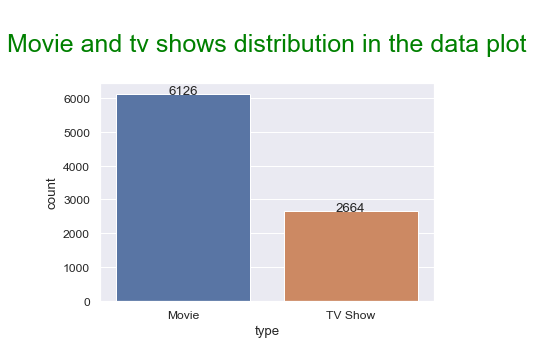

In [29]:
sns.set(font_scale = 1.1)
types = sns.countplot(data = df[['show_id','type']].drop_duplicates() , x = "type")
plt.title("\nMovie and tv shows distribution in the data plot\n",fontsize=25,color="green")
show_values_on_bars(types,h_v="v",space=1)

In [30]:
donut = px.pie(df[['show_id','type']].drop_duplicates(), names='type', height=300, width=600, hole=0.7,title='Most watched on Netflix',
                   color_discrete_sequence=['#b20710', '#221f1f'])

donut.update_traces(hovertemplate=None, textposition='outside',textinfo='percent+label', rotation=90)

donut.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,plot_bgcolor='#333', 
                        paper_bgcolor='#333',title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                        font=dict(size=17, color='#8a8d93'),
                        hoverlabel=dict(bgcolor="#444", font_size=13,font_family="Lato, sans-serif"))

<B>Observation:</B>  
Well, customers prefer to watch Movies over TV Show as 69.7% of the content is Movies.

#### 9.1.2 Percentage of data distribution in Release year, Genres, Ratings, Country and Duration columns



Percentage of Data distribution in "release_year" column

2018    13
2017    11
2019    11
2020    10
2016    10
2021     6
2015     6
2014     4
2013     3
2012     2
2010     2
2011     2
2009     1
2008     1
2006     1
2007     1
2005     0
2004     0
2003     0
2002     0
Name: release_year, dtype: int64


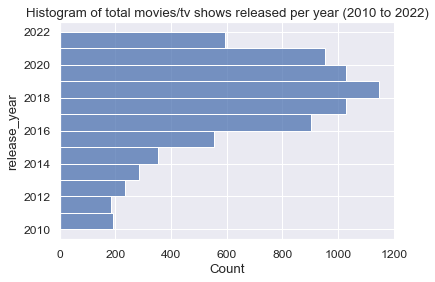



Percentage of Data distribution in "rating" column

TV-MA       36
TV-14       24
TV-PG        9
R            9
PG-13        5
TV-Y7        3
TV-Y         3
PG           3
TV-G         2
NR           0
G            0
TV-Y7-FV     0
NC-17        0
UR           0
Name: rating, dtype: int64


Percentage of Data distribution in "duration_in_minutes" column

0      30
90      1
97      1
94      1
93      1
91      1
95      1
96      1
92      1
102     1
98      1
99      1
101     1
88      1
103     1
106     1
100     1
89      1
104     1
86      1
Name: duration_in_minutes, dtype: int64


Percentage of Data distribution in "genre" column

International Movies        14
Dramas                      12
Comedies                     8
International TV Shows       6
Documentaries                4
Action & Adventure           4
Children & Family Movies     3
Romantic Movies              3
Independent Movies           3
TV Dramas                    3
Thrillers                    2
TV Comed

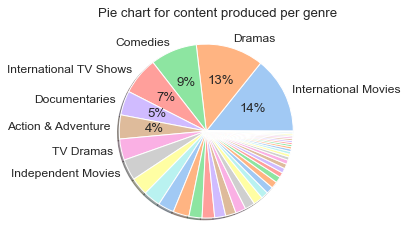



Percentage of Data distribution in "country" column

United States     33
India              9
Unknown            7
United Kingdom     7
Canada             4
France             3
Japan              2
Spain              2
South Korea        2
Germany            2
Australia          1
Egypt              1
Turkey             1
China              1
Mexico             1
Cayman Islands     0
Afghanistan        0
Samoa              0
Azerbaijan         0
East Germany       0
Name: country, dtype: int64


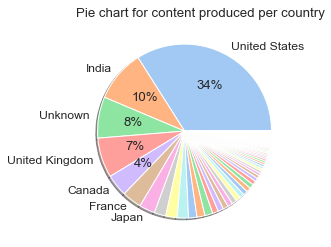

In [31]:
for column in ['release_year', 'rating', 'duration_in_minutes']:
    print(f"\n\nPercentage of Data distribution in \"{column}\" column\n")
    print((df[['show_id', column]].drop_duplicates()[column].value_counts()*100//len(df[['show_id', column]].drop_duplicates()[column])).head(20))
    if column == 'release_year':
        sns.histplot(data=df[['show_id', column]].drop_duplicates(), y=column, binrange=(2010, 2022), binwidth=1).set(title='Histogram of total movies/tv shows released per year (2010 to 2022)')
        plt.show()
for column in ['genre', 'country']:
    print(f"\n\nPercentage of Data distribution in \"{column}\" column\n")
    print((df[['show_id', column]].drop_duplicates()[column].value_counts()*100//len(df[['show_id', column]].drop_duplicates()[column])).sort_values(ascending=False).head(20))
    if column in ['country', 'genre']:
        colors = sns.color_palette('pastel')
        lab = df[['show_id', column]].drop_duplicates()[column].value_counts().reset_index()
        limit = 0
        if column == 'country':
            limit = 250
        else:
            limit = 700
        lab.loc[lab[column]<=limit, 'index'] = ''
        plt.pie(df[['show_id', column]].drop_duplicates()[column].value_counts(), labels=lab['index'], colors=colors, autopct=lambda x: ('%.0f%%' % x) if x>=4 else '', shadow=True, rotatelabels=False)
        plt.title(f"Pie chart for content produced per {column}", loc='left')
        plt.show()

### 9.2 Analyzing rating values
The following code snippet groups redundant rating values together as well as fix the invalid rating values.  

<B>Observations:</B>
- A major chunk <B>(42-46%)</B> of the content <B>(both movies and tv-shows)</B> is suitable for <B>mature adults</B> only.    
Also, a huge portion <B>(69-77%)</B> of the content <B>(both movies and tv-shows)</B> on netflix is not suitable for the audience <B>under 14 years</B> of age.


Ratings distribution for movies in percentage

TV-MA       33
TV-14       23
R           13
TV-PG        8
PG-13        7
PG           4
TV-Y7        2
TV-Y         2
TV-G         2
NR           1
G            0
TV-Y7-FV     0
NC-17        0
UR           0
Name: rating, dtype: int64 



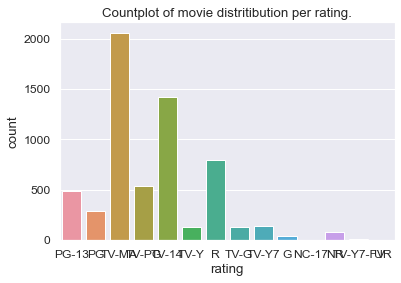



Ratings distribution for tv shows in percentage

TV-MA       42
TV-14       27
TV-PG       12
TV-Y7        7
TV-Y         6
TV-G         3
NR           0
R            0
TV-Y7-FV     0
Name: rating, dtype: int64 



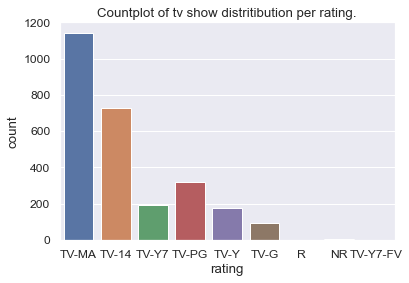

In [32]:
print("\nRatings distribution for movies in percentage\n")
print((df[df['type']=='Movie'][['show_id', 'rating']].drop_duplicates()['rating'].value_counts()*100//len(df[df['type']=='Movie'][['show_id', 'rating']].drop_duplicates()['rating'])).head(20), '\n')
sns.countplot(x = 'rating', data=df[df['type']=='Movie'][['show_id', 'rating']].drop_duplicates()).set(title="Countplot of movie distritibution per rating.")
plt.show()

print("\n\nRatings distribution for tv shows in percentage\n")
print((df[df['type']=='TV Show'][['show_id', 'rating']].drop_duplicates()['rating'].value_counts()*100//len(df[df['type']=='TV Show'][['show_id', 'rating']].drop_duplicates()['rating'])).head(20), '\n')
sns.countplot(x = 'rating', data=df[df['type']=='TV Show'][['show_id', 'rating']].drop_duplicates()).set(title="Countplot of tv show distritibution per rating.")
plt.show()

### 9.3 Analyzing country values
<B>Observations:</B>  
- A huge chunk (30-35%) of the content on Netflix (both movies and tv-shows) is produced in United States only.


Distribution of movies produced per country in percentage

United States     35
India             12
United Kingdom     6
Unknown            5
Canada             4
France             3
Germany            2
Spain              2
Japan              1
China              1
Mexico             1
Egypt              1
Hong Kong          1
Nigeria            1
Australia          1
Indonesia          1
Turkey             1
Philippines        1
Belgium            0
Italy              0
Name: country, dtype: int64


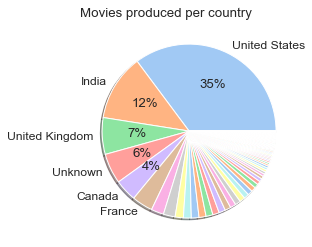



Distribution of tv shows produced per country in percentage

United States     30
Unknown           12
United Kingdom     8
Japan              6
South Korea        5
Canada             4
France             2
India              2
Taiwan             2
Australia          2
Spain              2
Mexico             1
China              1
Germany            1
Colombia           1
Brazil             1
Turkey             0
Italy              0
Thailand           0
Singapore          0
Name: country, dtype: int64


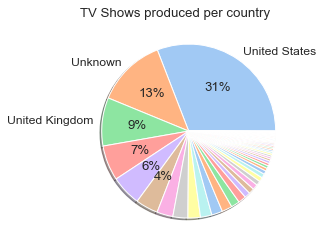

In [33]:
print("\nDistribution of movies produced per country in percentage\n")
print((df[df['type']=='Movie'][['show_id', 'country']].drop_duplicates()['country'].value_counts()*100//len(df[df['type']=='Movie'][['show_id', 'country']].drop_duplicates()['country'])).head(20))
colors = sns.color_palette('pastel')
lab = df[df['type']=='Movie'][['show_id', 'country']].drop_duplicates()['country'].value_counts().reset_index()
limit = 200
lab.loc[lab['country']<=limit, 'index'] = ''
plt.pie(df[df['type']=='Movie'][['show_id', 'country']].drop_duplicates()['country'].value_counts(), labels=lab['index'], colors=colors, autopct=lambda x: ('%.0f%%' % x) if x>=4 else '', shadow=True, rotatelabels=False)
plt.title(f"Movies produced per country", loc='left')
plt.show()

print("\n\nDistribution of tv shows produced per country in percentage\n")
print((df[df['type']=='TV Show'][['show_id', 'country']].drop_duplicates()['country'].value_counts()*100//len(df[df['type']=='TV Show'][['show_id', 'country']].drop_duplicates()['country'])).head(20))
colors = sns.color_palette('pastel')
lab = df[df['type']=='TV Show'][['show_id', 'country']].drop_duplicates()['country'].value_counts().reset_index()
limit = 200
lab.loc[lab['country']<=limit, 'index'] = ''
plt.pie(df[df['type']=='TV Show'][['show_id', 'country']].drop_duplicates()['country'].value_counts(), labels=lab['index'], colors=colors, autopct=lambda x: ('%.0f%%' % x) if x>=4 else '', shadow=True, rotatelabels=False)
plt.title(f"TV Shows produced per country", loc='left')
plt.show()

### 9.4 Analyzing genre values
<B>Observations:</B>  
- International content, comedy and drama constitutes a major chunk (43-50%) of the content on Netflix.


Distribution of movies produced per genre in percentage

International Movies        20
Dramas                      18
Comedies                    12
Documentaries                6
Action & Adventure           6
Independent Movies           5
Children & Family Movies     4
Romantic Movies              4
Thrillers                    4
Music & Musicals             2
Horror Movies                2
Stand-Up Comedy              2
Sci-Fi & Fantasy             1
Sports Movies                1
Classic Movies               0
LGBTQ Movies                 0
Anime Features               0
Cult Movies                  0
Faith & Spirituality         0
Movies                       0
Name: genre, dtype: int64


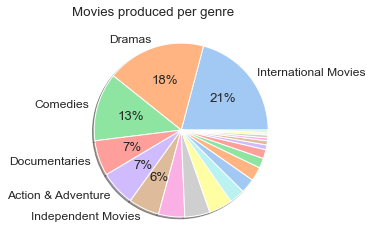



Distribution of tv shows produced per genre in percentage

International TV Shows          22
TV Dramas                       12
TV Comedies                      9
Crime TV Shows                   7
Kids' TV                         7
Docuseries                       6
Romantic TV Shows                6
Reality TV                       4
British TV Shows                 4
Anime Series                     2
Spanish-Language TV Shows        2
TV Action & Adventure            2
Korean TV Shows                  2
TV Mysteries                     1
Science & Nature TV              1
TV Sci-Fi & Fantasy              1
TV Horror                        1
Teen TV Shows                    1
TV Thrillers                     0
Stand-Up Comedy & Talk Shows     0
Name: genre, dtype: int64


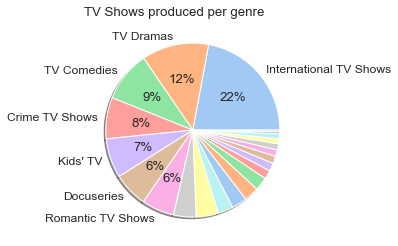

In [34]:
print("\nDistribution of movies produced per genre in percentage\n")
print((df[df['type']=='Movie'][['show_id', 'genre']].drop_duplicates()['genre'].value_counts()*100//len(df[df['type']=='Movie'][['show_id', 'genre']].drop_duplicates()['genre'])).head(20))
colors = sns.color_palette('pastel')
lab = df[df['type']=='Movie'][['show_id', 'genre']].drop_duplicates()['genre'].value_counts().reset_index()
limit = 650
lab.loc[lab['genre']<=limit, 'index'] = ''
plt.pie(df[df['type']=='Movie'][['show_id', 'genre']].drop_duplicates()['genre'].value_counts(), labels=lab['index'], colors=colors, autopct=lambda x: ('%.0f%%' % x) if x>=5 else '', shadow=True, rotatelabels=False)
plt.title(f"Movies produced per genre", loc='left')
plt.show()

print("\n\nDistribution of tv shows produced per genre in percentage\n")
print((df[df['type']=='TV Show'][['show_id', 'genre']].drop_duplicates()['genre'].value_counts()*100//len(df[df['type']=='TV Show'][['show_id', 'genre']].drop_duplicates()['genre'])).head(20))
colors = sns.color_palette('pastel')
lab = df[df['type']=='TV Show'][['show_id', 'genre']].drop_duplicates()['genre'].value_counts().reset_index()
limit = 350
lab.loc[lab['genre']<=limit, 'index'] = ''
plt.pie(df[df['type']=='TV Show'][['show_id', 'genre']].drop_duplicates()['genre'].value_counts(), labels=lab['index'], colors=colors, autopct=lambda x: ('%.0f%%' % x) if x>=5 else '', shadow=True, rotatelabels=False)
plt.title(f"TV Shows produced per genre", loc='left')
plt.show()

### 9.5 Analyzing director values
<B>Observations:</B>  
1. Directors like Rajiv Chilaka, Jan Suter and Raul Campos are the top 3 directors in the world by number of movies directed.
2. Directors like Alastair Fothergill, and Ken Burns are the topmost directors in the world by number of tv shows directed.

In [35]:
df['director'].replace('nan', 'Unknown', inplace=True)

print("\nDistribution of movies produced by each director in total counts\n")
print((df[df['type']=='Movie'][['show_id', 'director']].drop_duplicates()['director'].value_counts()).head(20))

print("\n\nDistribution of tv shows produced by each director in total counts\n")
print((df[df['type']=='TV Show'][['show_id', 'director']].drop_duplicates()['director'].value_counts()).head(20))


Distribution of movies produced by each director in total counts

Unknown                187
Rajiv Chilaka           22
Jan Suter               21
Raúl Campos             19
Suhas Kadav             16
Jay Karas               15
Marcus Raboy            15
Cathy Garcia-Molina     13
Jay Chapman             12
Martin Scorsese         12
Youssef Chahine         12
Steven Spielberg        11
Don Michael Paul        10
Shannon Hartman          9
David Dhawan             9
Yılmaz Erdoğan           9
Johnnie To               8
Lance Bangs              8
Hakan Algül              8
Hanung Bramantyo         8
Name: director, dtype: int64


Distribution of tv shows produced by each director in total counts

Unknown                  2434
Alastair Fothergill         3
Ken Burns                   3
Iginio Straffi              2
Gautham Vasudev Menon       2
Hsu Fu-chun                 2
Stan Lathan                 2
Shin Won-ho                 2
Joe Berlinger               2
Lynn Novick             

### 9.6 Analyzing cast values
<B>Observations:</B>  
1. Takahiro Sakurai has acted in most number of tv shows (25) on Netflix.
2. Anupam Kher has acted in most number of movies (42) on Netflix.

In [36]:
print("\nDistribution of movies per actor in total counts\n")
print((df[df['type']=='Movie'][['show_id', 'cast']].drop_duplicates()['cast'].value_counts()).head(20))

print("\n\nDistribution of tv shows per actor in total counts\n")
print((df[df['type']=='TV Show'][['show_id', 'cast']].drop_duplicates()['cast'].value_counts()).head(20))


Distribution of movies per actor in total counts

Unknown                475
Anupam Kher             42
Shah Rukh Khan          35
Naseeruddin Shah        32
Akshay Kumar            30
Om Puri                 30
Amitabh Bachchan        28
Paresh Rawal            28
Julie Tejwani           28
Boman Irani             27
Rupa Bhimani            27
Kareena Kapoor          25
Samuel L. Jackson       22
Rajesh Kava             21
Ajay Devgn              21
Kay Kay Menon           20
Adam Sandler            20
Nicolas Cage            20
Nawazuddin Siddiqui     20
Salman Khan             20
Name: cast, dtype: int64


Distribution of tv shows per actor in total counts

Unknown                350
Takahiro Sakurai        25
Yuki Kaji               19
Junichi Suwabe          17
Daisuke Ono             17
Ai Kayano               16
Yuichi Nakamura         16
Jun Fukuyama            15
Yoshimasa Hosoya        15
David Attenborough      14
Kana Hanazawa           13
Hiroshi Kamiya          13
Takehi

###  9.7 Data distribution for the year, day, month and weekday when the movie/tv show was added to Netflix

The following output shows disribution of data in integer percentages for multiple tables.  
<B>Observations:</B>  
1. Majority of the content being streamed on Netflix was added after 2015.  
We can see a sudden drop in the content being added to Netflix since 2019, which probably shows the effect of Covid-19 on the production and release of movies/tv-shows.
2. Majority of the content is added on 1st and the 15th day of the month on Netflix.
3. Majority of the content is added during the first 4 days of the week (Mon, Tue, Wed, Thu) on Netflix.


Percentage of movies and tv shows distribution in Year added, Month added, Day added, Weekday added and Weekend added columns


Percentage of movie distribution in "year_added" column

2019    23
2020    20
2018    20
2021    16
2017    13
2016     4
2015     0
2014     0
2011     0
2013     0
2012     0
2009     0
2008     0
2010     0
Name: year_added, dtype: int64


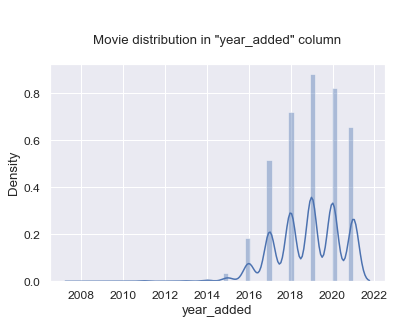



Percentage of tv show distribution in "year_added" column

2020    22
2019    22
2021    18
2018    15
2017    13
2016     6
2015     0
2014     0
2013     0
2008     0
Name: year_added, dtype: int64


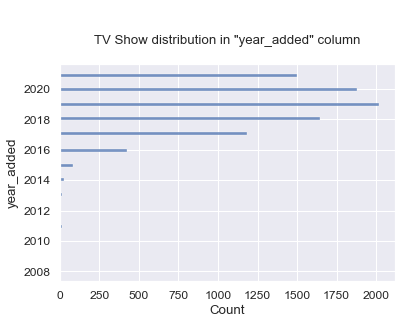



Percentage of movie distribution in "month_added" column

7     9
4     8
12    8
1     8
10    8
3     8
9     8
8     8
11    8
6     8
5     7
2     6
Name: month_added, dtype: int64


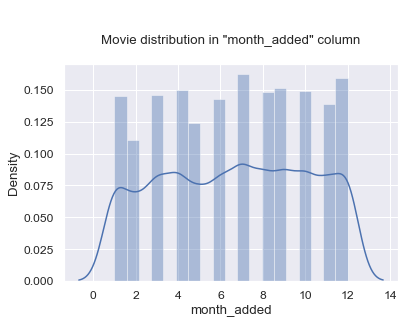



Percentage of tv show distribution in "month_added" column

12    9
7     9
9     9
8     8
6     8
10    8
4     8
3     7
11    7
5     7
1     7
2     6
Name: month_added, dtype: int64


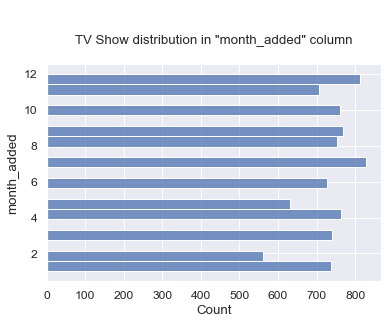



Percentage of movie distribution in "day_added" column

1     27
15     7
2      3
16     3
31     3
20     2
19     2
5      2
26     2
22     2
6      2
18     2
25     2
10     2
28     2
21     2
7      2
8      2
27     2
23     2
Name: day_added, dtype: int64


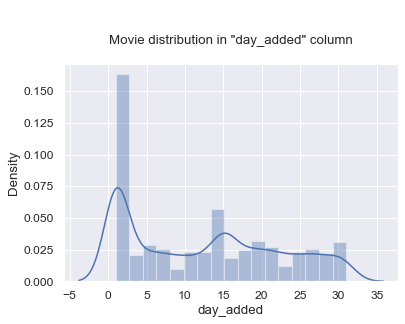



Percentage of tv show distribution in "day_added" column

1     19
15     8
30     3
31     3
2      3
22     3
20     3
10     3
14     2
19     2
16     2
8      2
17     2
6      2
18     2
27     2
7      2
5      2
23     2
21     2
Name: day_added, dtype: int64


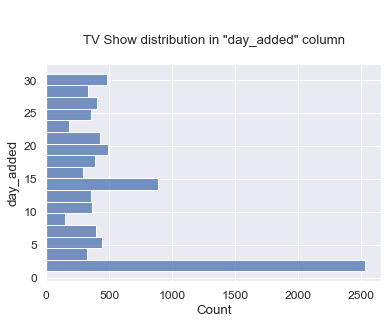



Percentage of movie distribution in "weekday_added" column

4    25
3    17
2    14
1    13
0    10
6     9
5     9
Name: weekday_added, dtype: int64


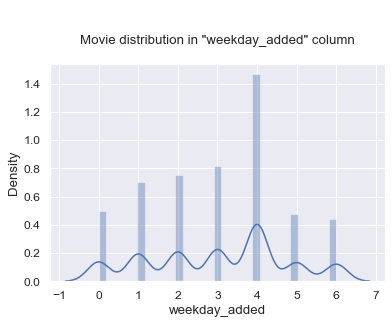



Percentage of tv show distribution in "weekday_added" column

4    34
2    14
1    12
3    12
5     9
0     8
6     6
Name: weekday_added, dtype: int64


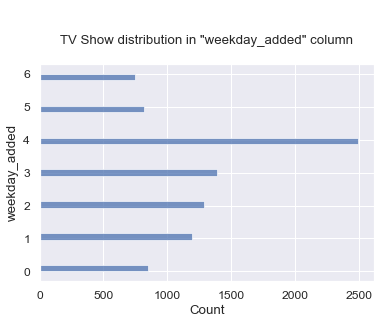



Percentage of movie distribution in "is_weekend_added" column

0    81
1    18
Name: is_weekend_added, dtype: int64


Percentage of tv show distribution in "is_weekend_added" column

0    83
1    16
Name: is_weekend_added, dtype: int64


In [37]:
print("\nPercentage of movies and tv shows distribution in Year added, Month added, Day added, Weekday added and Weekend added columns")
for column in ['year_added', 'month_added', 'day_added', 'weekday_added', 'is_weekend_added']:
    print(f"\n\nPercentage of movie distribution in \"{column}\" column\n")
    print((df[df.type == 'Movie'][['show_id', column]].drop_duplicates()[column].value_counts()*100//len(df[df.type == 'Movie'][['show_id', column]].drop_duplicates()[column])).head(20))
    if column not in ['is_weekend_added']:
        sns.distplot(df[['show_id', column]].drop_duplicates()[column]).set(title=f"\n\nMovie distribution in \"{column}\" column\n")
        plt.show()
    print(f"\n\nPercentage of tv show distribution in \"{column}\" column\n")
    print((df[df.type == 'TV Show'][['show_id', column]].drop_duplicates()[column].value_counts()*100//len(df[df.type == 'TV Show'][['show_id', column]].drop_duplicates()[column])).head(20))
    if column not in ['is_weekend_added']:
        sns.histplot(data=df[['show_id', column]].drop_duplicates(), y=column).set(title=f"\n\nTV Show distribution in \"{column}\" column\n")
        plt.show()

### 9.8 Statistical summary of the data.
The following output shows
1. The stastical summary of the data.
2. Boxplots displaying range of the data and outliers.   

<B>Observations:</B>  

1. Movies are released from 1940s to 2021. Movies released before 2000s are outliers.
2. TV shows are released from 1920s to 2021. TV shows released before 2010's are outliers.
3. Movies are added to Netflix from 2008 to 2021. Movies added to Netflix before 2015 are outliers.
4. TV shows are added to Netflix from 2008 to 2021. TV shows added to Netflix before 2015 are outliers.
5. Movies and TV shows are added throughout the month on Netflix. Majority of movies and TV shows are added to Netflix in first half of the month.
6. Duration of the movies go upto 312 minutes on Netflix. Movies with duration less than 50 minutes or greater than 150 minutes are outliers.

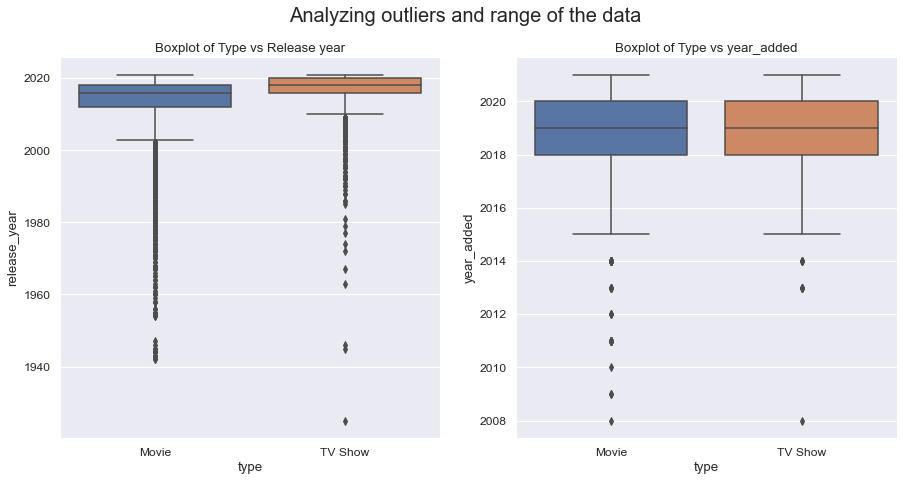

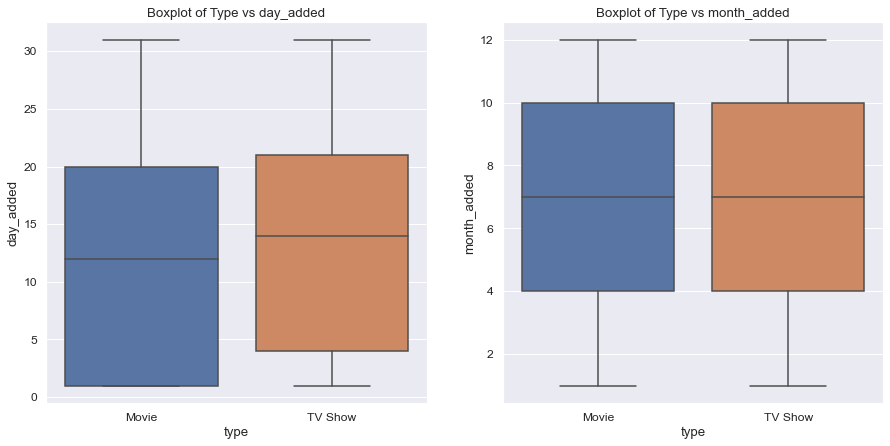

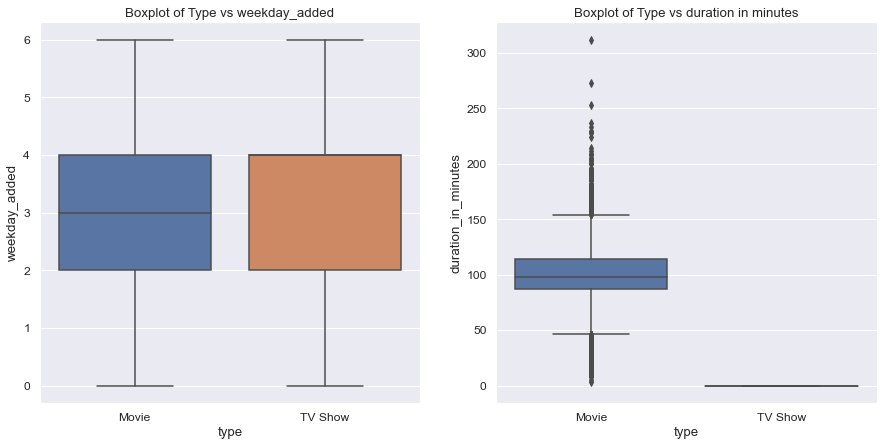

In [38]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
fig.suptitle('Analyzing outliers and range of the data', fontsize=20)
axes[0].set_title('Boxplot of Type vs Release year')
sns.boxplot(ax=axes[0], x="type", y="release_year", data=df[['show_id', 'type', 'release_year']].drop_duplicates())
axes[1].set_title('Boxplot of Type vs year_added')
sns.boxplot(ax=axes[1], x="type", y="year_added", data=df[['show_id', 'type', 'year_added']].drop_duplicates())
plt.show()
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
axes[0].set_title('Boxplot of Type vs day_added')
sns.boxplot(ax=axes[0], x="type", y="day_added", data=df[['show_id', 'type', 'day_added']].drop_duplicates())
axes[1].set_title('Boxplot of Type vs month_added')
sns.boxplot(ax=axes[1], x="type", y="month_added", data=df[['show_id', 'type', 'month_added']].drop_duplicates())
plt.show()
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
axes[0].set_title('Boxplot of Type vs weekday_added')
sns.boxplot(ax=axes[0], x="type", y="weekday_added", data=df[['show_id', 'type', 'weekday_added']].drop_duplicates())
axes[1].set_title('Boxplot of Type vs duration in minutes')
sns.boxplot(ax=axes[1], x='type', y="duration_in_minutes", data=df[['show_id', 'type', 'duration_in_minutes']].drop_duplicates())
plt.show()

### 9.9 Most popular actors, directors and genres in top 5 countries of the world on Netflix.
<B>Observations:</B>
1. Anupam Kher and Samulel Jackson are most popular movie actors in India and the United States respectively.
2. Takahiro Sakurai and David Attenborough are most popular tv show actors in India and the United States respectively.
3. Jay Karas and David Dhawan are most popular movie directors in the United States and India respectively.
4. Alastair Fothergill and Stan Lathan are most popular tv show directors in the United Kingdom and the United States respectively.
5. International Movies and Dramas are most popular movie genres in India and the United States respectively.
6. TV Comedies and British TV Shows are most popular tv show genres in the United States and the United Kingdom respectively.
7. TV-MA and TV-14 are most popular movie ratings in the United States and India respectively.
8. TV-MA is the most popular tv show rating in both the United States and the United Kingdom.

In [39]:
movies = df[(df['type'] == 'Movie') & (df['cast']!='Unknown') & (df['country'].isin(['United States', 'India', 'United Kingdom', 'Canada', 'France']))]
tv_shows = df[(df['type'] == 'TV Show') & (df['cast']!='Unknown') & (df['country'].isin(['United States', 'United Kingdom', 'Japan', 'South Korea', 'Canada']))]
for column in ['cast', 'director', 'genre', 'rating']:
    print(f"\n\nTop {column} in movies by countries\n")
    m = movies[movies[column] != 'Unknown']
    m = m.groupby(['country', column])['show_id'].nunique().reset_index()
    print(m[m.groupby(['country'])['show_id'].transform(max) == m['show_id']].sort_values(by='show_id', ascending=False).iloc[:,[0, 1]].drop_duplicates(subset='country'))
    print(f"\n\nTop {column} in tv shows by countries\n")
    t = tv_shows[tv_shows[column] != 'Unknown']
    t = t.groupby(['country', column])['show_id'].nunique().reset_index()
    print(t[t.groupby(['country'])['show_id'].transform(max) == t['show_id']].sort_values(by='show_id', ascending=False).iloc[:,[0, 1]].drop_duplicates(subset='country'))



Top cast in movies by countries

              country                cast
4529            India         Anupam Kher
20710   United States   Samuel L. Jackson
9172   United Kingdom         John Cleese
942            Canada  John Paul Tremblay
4118           France      Wille Lindberg


Top cast in tv shows by countries

             country                cast
1869           Japan    Takahiro Sakurai
3442  United Kingdom  David Attenborough
6393   United States        Grey Griffin
75            Canada       Ashleigh Ball
2192     South Korea        Cho Seong-ha


Top director in movies by countries

             country        director
2508   United States       Jay Karas
726            India    David Dhawan
134           Canada  Justin G. Dyck
551           France  Thierry Donard
1324  United Kingdom   Blair Simmons


Top director in tv shows by countries

            country             director
39   United Kingdom  Alastair Fothergill
102   United States          Stan Lathan
35   

### 9.10 Analysis of season counts movie duration change over the years on Netflix
<B>Observations:</B>  
1. As years passed by, tv shows with more and more number of season counts were added to Netflix.
2. Over the years, movie duration on Netflix has changed significantly from average 80-120 minutes to now include short films and longer duration movies too.

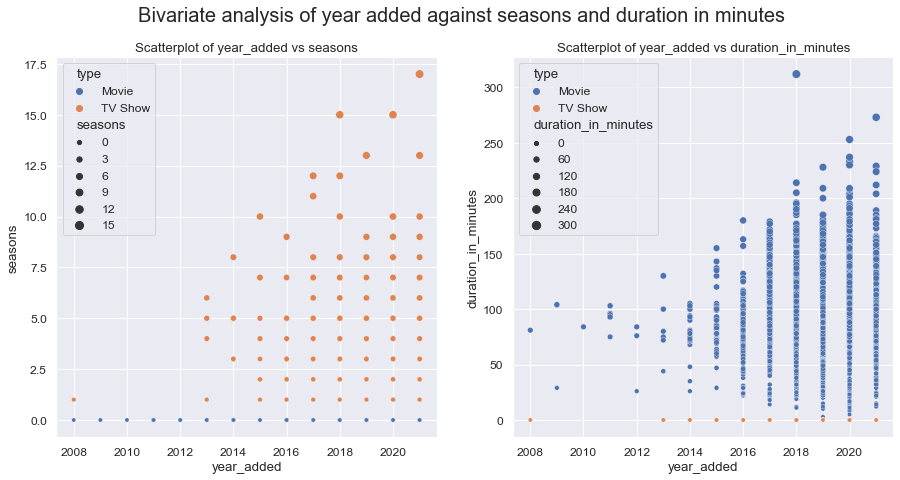

In [40]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
fig.suptitle('Bivariate analysis of year added against seasons and duration in minutes', fontsize=20)
axes[0].set_title('Scatterplot of year_added vs seasons')
sns.scatterplot(ax=axes[0], data=df[['show_id', 'year_added', 'seasons', 'type']].drop_duplicates(), x="year_added", y="seasons", hue='type', size='seasons')
axes[1].set_title('Scatterplot of year_added vs duration_in_minutes')
sns.scatterplot(ax=axes[1], data=df[['show_id', 'year_added', 'duration_in_minutes', 'type']].drop_duplicates(), x="year_added", y="duration_in_minutes", hue='type', size='duration_in_minutes')
plt.show()

### 9.11 Correlation between different columns.
<B>Observations:</B>
- release_year column is positively correlated with seasons and day_added columns.
- weekday_added column is highly correlated with is_weekend_added column.

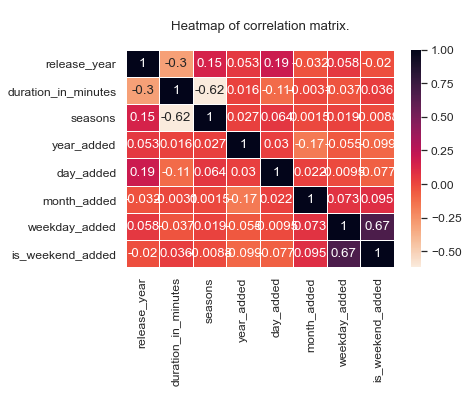

In [41]:
sns.heatmap(df.corr(), linewidths=.5, cmap=sns.cm.rocket_r, annot=True).set(title='\nHeatmap of correlation matrix.\n')
plt.show()

### 9.12 Analysis of season counts and day added change over the release years on Netflix
<B>Observations:</B>
1. As years passed by, tv shows with more and more number of season were released.
2. Old movies are added to Netflix on first day, last day or mid of the month compared to newly released movies which are added on all days of the month.

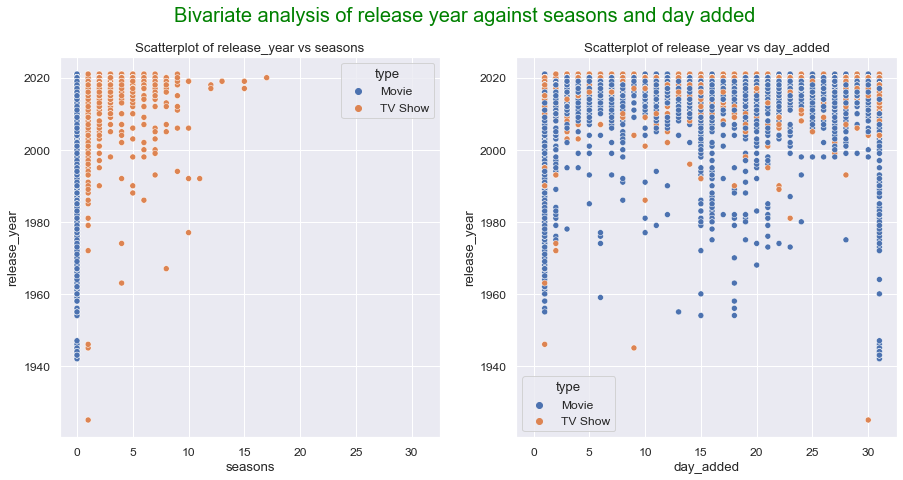

In [42]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
fig.suptitle('Bivariate analysis of release year against seasons and day added', fontsize=20,color='green')
axes[0].set_title('Scatterplot of release_year vs seasons')
sns.scatterplot(ax=axes[0], data=df[['show_id', 'release_year', 'seasons', 'type']].drop_duplicates(), x="seasons", y="release_year", hue='type')
axes[1].set_title('Scatterplot of release_year vs day_added')
sns.scatterplot(ax=axes[1], data=df[['show_id', 'release_year', 'day_added', 'type']].drop_duplicates(), x="day_added", y="release_year", hue='type')
plt.show()

### 9.13 -  Creating a seperate DataFrame which would only comprise of Movies

In [43]:
df_movie = df[df['type'] == 'Movie'].reset_index().drop(columns=['index'])
df_movie["date_added"] = pd.to_datetime(df_movie['date_added'])
df_movie.head()

show_id         director             cast        country  \
0      s1  Kirsten Johnson          Unknown  United States   
1      s7    Robert Cullen  Vanessa Hudgens        Unknown   
2      s7    Robert Cullen     Kimiko Glenn        Unknown   
3      s7    Robert Cullen    James Marsden        Unknown   
4      s7    Robert Cullen     Sofia Carson        Unknown   

                      genre   type                             title  \
0             Documentaries  Movie              Dick Johnson Is Dead   
1  Children & Family Movies  Movie  My Little Pony: A New Generation   
2  Children & Family Movies  Movie  My Little Pony: A New Generation   
3  Children & Family Movies  Movie  My Little Pony: A New Generation   
4  Children & Family Movies  Movie  My Little Pony: A New Generation   

  date_added  release_year rating duration ratings_ages  duration_in_minutes  \
0 2021-09-25          2020  PG-13   90 min        Teens                   90   
1 2021-09-24          2021     PG   91 min   Older Kids                   91   
2 2021-09-24          2021     PG   91 min   Older Kids                   91   
3 2021-09-24          2021     PG   91 min   Older Kids                   91   
4 2021-09-24          2021     PG   91 min   Older Kids                   91   

   seasons  year_added  day_added  month_added  weekday_added  \
0        0        2021         25            9              5   
1        0        2021         24            9              4   
2        0        2021         24            9              4   
3        0        2021         24            9              4   
4        0        2021         24            9              4   

   is_weekend_added  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0

#### Chart 1 - Distribution of Movie duration in minutes

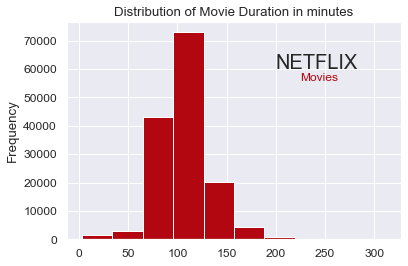

In [44]:
df_movie['duration_in_minutes'].plot(kind='hist',color='#b20710',title = "Distribution of Movie Duration in minutes")
plt.annotate("NETFLIX",xy=(200,60000),fontsize=20)
plt.annotate("Movies",xy=(225,56000),fontsize=12,color='#b20710')
plt.show()

<B>Observation :</B>
    The above distribution states taht the average movie duration is around 100 minutes whereas majority of the movies have duration between the range 70-130 minutes
    
#### Chart 2 - Number of movies released per year over the last 30 years    

In [45]:
df_movie['release_year'] = df_movie['release_year'].apply(lambda x : int(x))
df_movie_year = df_movie.groupby('release_year').count()['show_id'].to_frame().reset_index()

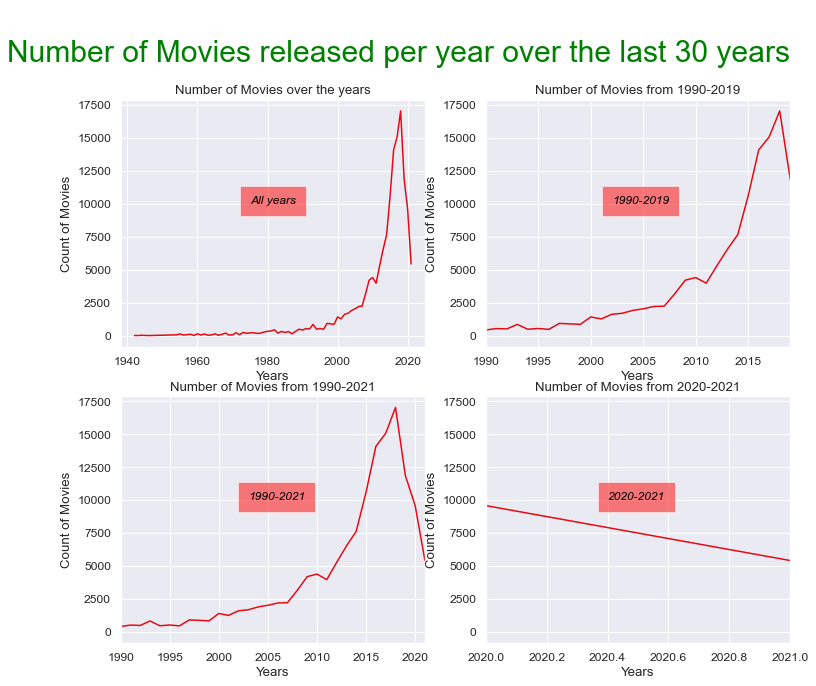

In [46]:
fig_movies = plt.figure(figsize=(12,10))
ax_mov = fig_movies.add_subplot(221)
ax_mov.plot( df_movie_year['release_year'], df_movie_year['show_id'],color="#e50914")
ax_mov.set_xlabel("Years")
ax_mov.set_ylabel("Count of Movies")
ax_mov.set_title("Number of Movies over the years")
ax_mov.annotate("All years",xy = (1975,10000),fontsize=12,
                color='black',style= 'italic',
                bbox=
                {'facecolor': 'Red', 'alpha': 0.5, 'pad': 10})

ax_mov1 = fig_movies.add_subplot(222)
ax_mov1.plot( df_movie_year['release_year'], df_movie_year['show_id'],color="#e50914")
ax_mov1.set_xlabel("Years")
ax_mov1.set_ylabel("Count of Movies")
ax_mov1.set_title("Number of Movies from 1990-2019")
ax_mov1.set_xlim(1990,2019)
ax_mov1.annotate("1990-2019",xy = (2002,10000),fontsize=12,
                color='Black',style= 'italic',
                bbox=
                {'facecolor': 'Red', 'alpha': 0.5, 'pad': 10})

plt.title("\nNumber of Movies released per year over the last 30 years\n", fontsize=30, color="green",loc="right")

ax_mov2 = fig_movies.add_subplot(223)
ax_mov2.plot( df_movie_year['release_year'], df_movie_year['show_id'],color="#e50914")
ax_mov2.set_xlabel("Years")
ax_mov2.set_ylabel("Count of Movies")
ax_mov2.set_title("Number of Movies from 1990-2021")
ax_mov2.set_xlim(1990,2021)
ax_mov2.annotate("1990-2021",xy = (2003,10000),fontsize=12,
                color='Black',style= 'italic',
                bbox=
                {'facecolor': 'Red', 'alpha': 0.5, 'pad': 10})

ax_mov3 = fig_movies.add_subplot(224)
ax_mov3.plot( df_movie_year['release_year'], df_movie_year['show_id'],color="#e50914")
ax_mov3.set_xlabel("Years")
ax_mov3.set_ylabel("Count of Movies")
ax_mov3.set_title("Number of Movies from 2020-2021")
ax_mov3.set_xlim(2020,2021)
ax_mov3.annotate("2020-2021",xy = (2020.4,10000),fontsize=12,
                color='Black',style= 'italic',
                bbox=
                {'facecolor': 'Red', 'alpha': 0.5, 'pad': 10})
plt.show()

<B>Observation :</B>
- There is certainly a huge reduction in number of movies released in the recent years. This is attributed to the ongoing COVID pandemic which has affected all our lives.
- The surprising observation is that the number of movies released reduced even in the year 2019 which was pre-pandemic.

#### Chart 3 - The top 10 countries that have produced most content in Netflix

In [47]:
all_countries = []
for i in df_movie['country']:
    all_countries.append(i)
    
df_top10_countries = pd.Series(all_countries).value_counts()[:11]#.to_frame().drop(labels=['nan'])
df_top10_countries

United States     45788
India             21411
United Kingdom     8560
France             6605
Unknown            6197
Canada             5738
Japan              3525
Spain              3469
Germany            3427
China              2377
Nigeria            2236
dtype: int64

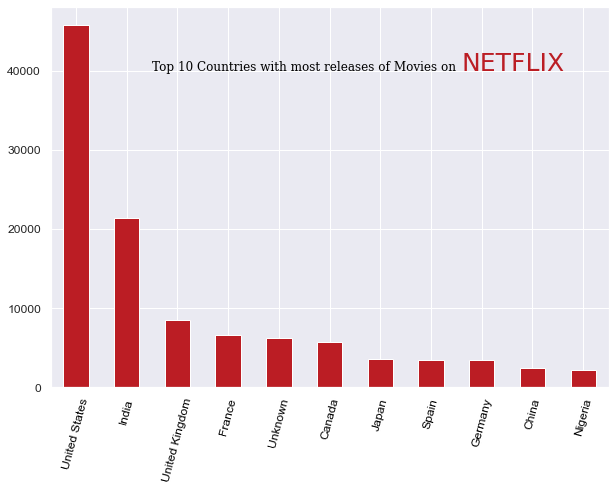

In [48]:
df_top10_countries.plot(kind='bar',color = "#bb1d24",figsize=(10,7))
plt.annotate("Top 10 Countries with most releases of Movies on",xy=(1.5,40000),fontsize=12,
             color='black',fontfamily='serif')
plt.annotate("NETFLIX",xy=(7.6,40000),fontsize=25,
             color='#bb1d24',fontfamily='DejaVu Sans')
plt.xticks(rotation=75,color="black")
plt.show()

<B>Observation :</B>.

The number of content produced in USA is almost 3 times the sum of India which is the second largest content producer for Netflix.

#### Chart 4 - Top 10 countries and their genres

In [49]:
df_exp_genre = df.explode("country").explode('genre')
temp_country = list(set(list(df_exp_genre['country'].unique())) - set(list(df_top10_countries.index.values)))
temp_country_df = df_exp_genre.set_index('country').drop(labels=temp_country).reset_index()
countries_movietypes = pd.crosstab(temp_country_df['genre'],temp_country_df['country'])
display(countries_movietypes)

country                       Canada  China  France  Germany  India  Japan  \
genre                                                                        
Action & Adventure               432    573     378      340   1187    823   
Anime Features                     0     28       0        0      0    814   
Anime Series                      11      8       0        0      0   1745   
British TV Shows                  49     24      16       36     19      5   
Children & Family Movies         919    189     367      186    225    238   
Classic & Cult TV                 41      0       0        0      0      0   
Classic Movies                     0      0      62        0     98     29   
Comedies                        1017    345     567      407   2685    128   
Crime TV Shows                   122     31     184      147     61    177   
Cult Movies                       70      9      22       62     42     14   
Documentaries                     95      8     116       27     32     19   
Docuseries                        31      1       7        9     15      8   
Dramas                           793    277    1707      763   5569    208   
Faith & Spirituality              14      1      32        1     20      0   
Horror Movies                    363     17      93       66    307     52   
Independent Movies               392     12     716      290   1394     64   
International Movies             437    644    1739      704   7059    810   
International TV Shows           177    292     430      326    428   1787   
Kids' TV                         534     48     294       56     57    309   
Korean TV Shows                    9      4       0        0      0      0   
LGBTQ Movies                      39      0       8        1     33     10   
Movies                            54      0      11        2      0     19   
Music & Musicals                  98     16      53       86    847     39   
Reality TV                        31      7      26       28      7     66   
Romantic Movies                  189     88     191       87    931     99   
Romantic TV Shows                 17    140      10       12     68    209   
Sci-Fi & Fantasy                 289    124     102      125    111    114   
Science & Nature TV                4      0       1        3      0      0   
Spanish-Language TV Shows          0      0       0        0      0      0   
Sports Movies                    113      2      45       24    121      1   
Stand-Up Comedy                    9      0       5       12      7      0   
Stand-Up Comedy & Talk Shows       0      0       2        6      8      4   
TV Action & Adventure            116     81      82       18     44     57   
TV Comedies                      289     81     174       40    141     83   
TV Dramas                        343    150     320      255    272    218   
TV Horror                         90      0      52        0     28     66   
TV Mysteries                     113     10      15       13     11     46   
TV Sci-Fi & Fantasy               83     29      11        7     27      0   
TV Shows                           0      0       0        0    207     22   
TV Thrillers                      91      0      23        0      3     79   
Teen TV Shows                     26     34       0        0      7    193   
Thrillers                        415     44     391      244    743     44   

country                       Nigeria  Spain  United Kingdom  United States  \
genre                                                                         
Action & Adventure                 45     99             859           4508   
Anime Features                      0      0               0            103   
Anime Series                        0      5               0            209   
British TV Shows                    0     37            1329            147   
Children & Family Movies            0    109             566           4888   
Classic & Cult

<B>Some of the inferences are as follows:</B>

- United States has the most movies produced almost across all genres
- India has the most number of Dramas geners, as "International Movies" is not really a genre.
- Japan has the most number of anime centric shows

<B>Recommendation to Netflix:</B>

- Japanese people has a very strong affection to animes, hence Netflix should produce more animes in Japan

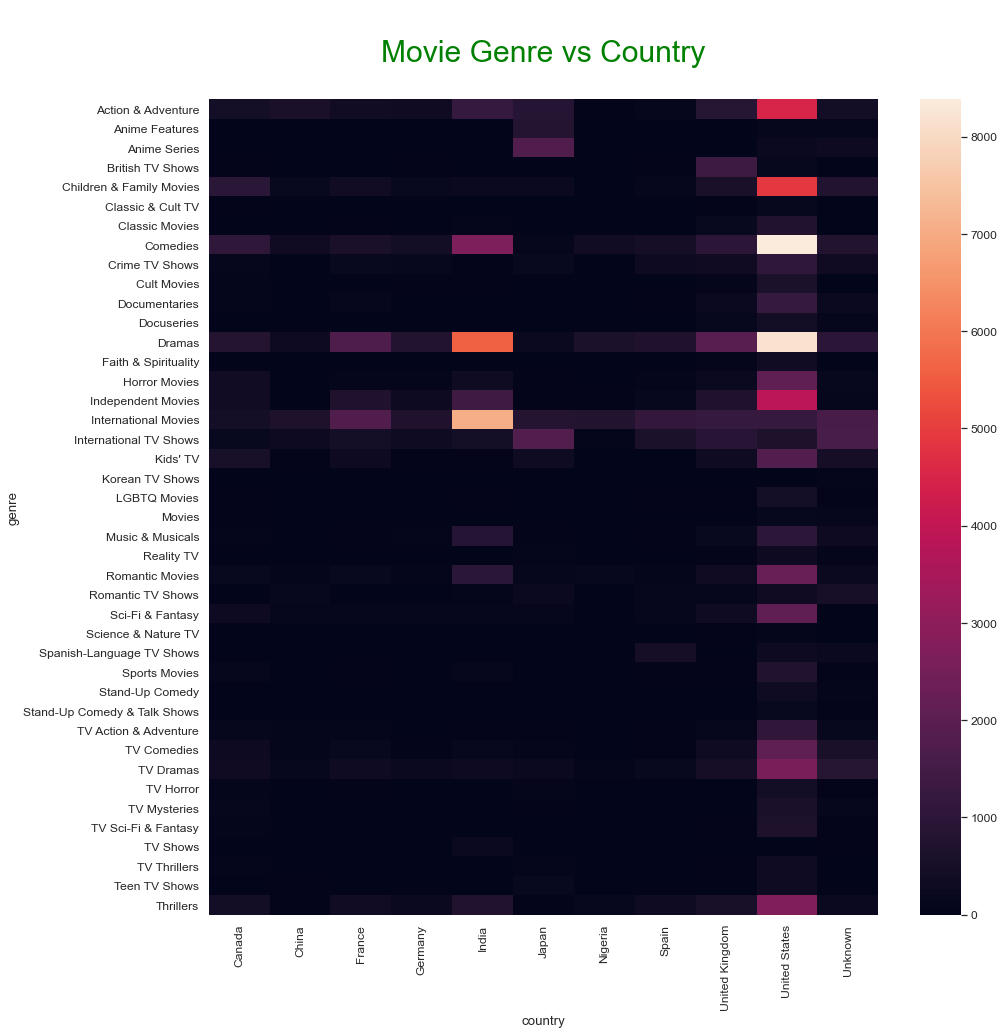

In [50]:
fig_1, ax_1 = plt.subplots(figsize=(15,15)) 
sns.heatmap(countries_movietypes)

plt.title("\nMovie Genre vs Country\n", fontsize=30, color="green")
plt.show()

<B>The heatmap above shows the relationship between the type of movies/shows across the top 10 countries.</B>

<B>Observations:</B>

- United State's favourite kind of genre is "Comedies"

- India's favourite type of genre is "Drama" as well since "International Movies" is not really a genre.

##### Anime Series

In [51]:
print('\nTop \033[1mDirector\'s involved in Anime Series production in JAPAN\033[0m are:')
temp_country_df[(temp_country_df['country']== 'Japan') & (temp_country_df['genre']== 'Anime Series') ]['director'].value_counts()[1:]


Top Director's involved in Anime Series production in JAPAN are:


Yasuhiro Irie        21
Go Koga              15
Masaaki Yuasa        13
Tensai Okamura       13
Kazuya Murata        11
Tsutomu Mizushima     8
Hayato Date           8
Takuya Igarashi       7
Name: director, dtype: int64

##### Drama

In [52]:
print('\nTop \033[1mDirector\'s involved in Dramas production in INDIA\033[0m are:')
temp_country_df[(temp_country_df['country']== 'India') & (temp_country_df['genre']== 'Dramas') ]['director'].value_counts()[1:]


Top Director's involved in Dramas production in INDIA are:


Sooraj R. Barjatya    60
Dibakar Banerjee      57
Zoya Akhtar           49
Karan Johar           48
Umesh Mehra           46
                      ..
Parthiban              1
Harry Baweja           1
Arjun Gourisaria       1
Vinod Kapri            1
Aatmaram Dharne        1
Name: director, Length: 521, dtype: int64

<B>Observation :</B> 
- Yasuhiro Irie appears to be a popular choice for Anime Series
- Sooraj R. Barjatya has directed many Dramas in India

<B>Recommendation to Netflix :</B> 
- Approach Yasuhiro Irie to create Anime Series genre TV show for Netflix Originals and Sooraj R. Barjatya to create more Netflix Originals Dramas

#### Chart 5 - Duration of Movies over the years

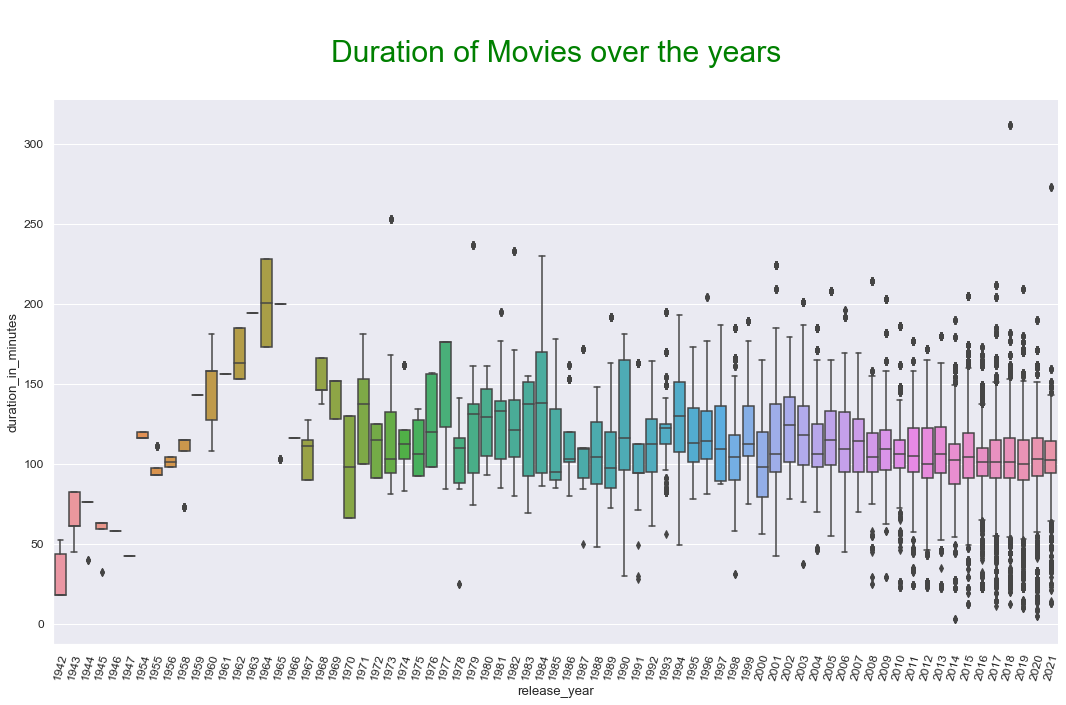

In [53]:
order_year = list(pd.Series(df_movie['release_year'].unique()).sort_values())

plt.figure(figsize=(18,10))
ax = sns.boxplot(df_movie['release_year'],df_movie['duration_in_minutes'],order=order_year)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75)
sns.despine()
plt.title("\nDuration of Movies over the years\n", fontsize=30, color="green")
plt.show()

The above boxplot helps us visualise the movie duration over the years.

Observation : Till 1990 the movies were of long duration whereas from the 1900 onwards the movies are on an average for 1.5hr to 2.5hr.

#### Values for: Shortest and Longest Movie on Netflix

In [54]:
movie_dur = df_movie.groupby("duration_in_minutes")['title'].unique().reset_index()

In [55]:
print('\nTop \033[1mShortest movie on Netflix \033[0m are:')
shortest_movie = min(movie_dur['duration_in_minutes'])
shortest_movie = movie_dur[movie_dur['duration_in_minutes'] == shortest_movie]
shortest_movie


Top Shortest movie on Netflix  are:


duration_in_minutes     title
0                    3  [Silent]

In [56]:
print('\nTop \033[1mLongest movie on Netflix \033[0m are:')
longest_movie = max(movie_dur['duration_in_minutes'])
longest_movie = movie_dur[movie_dur['duration_in_minutes'] == longest_movie]
longest_movie


Top Longest movie on Netflix  are:


duration_in_minutes                         title
204                  312  [Black Mirror: Bandersnatch]

#### Chart 6 - Distribution on the bases of age groups, and the countplot graph

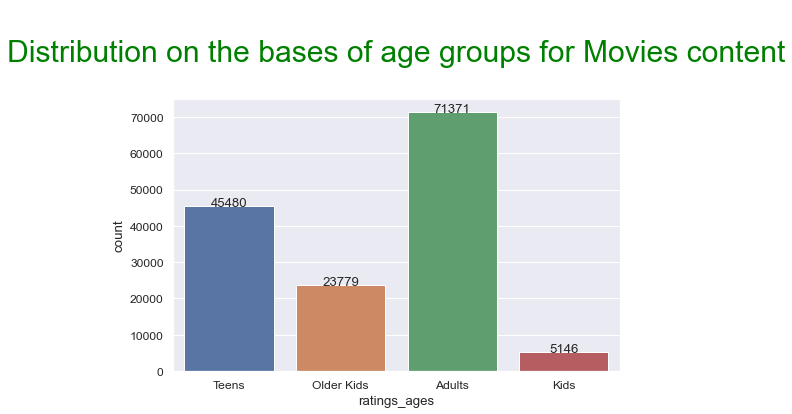

In [57]:
age_base_distribution = df_movie["ratings_ages"].value_counts()
age_base_distribution
age_base_distribution_in_percent = df_movie["ratings_ages"].value_counts(normalize=True)*100
age_base_distribution_in_percent

plt.figure(figsize=(8,5))
show_values_on_bars(sns.countplot(x = df_movie["ratings_ages"]))
plt.title("\nDistribution on the bases of age groups for Movies content\n", fontsize=30, color="green")
plt.show()

<B>Observation :</B>
    Netflix has more content for Adult age group
    
#### Chart 7 - Best time to launch a content    

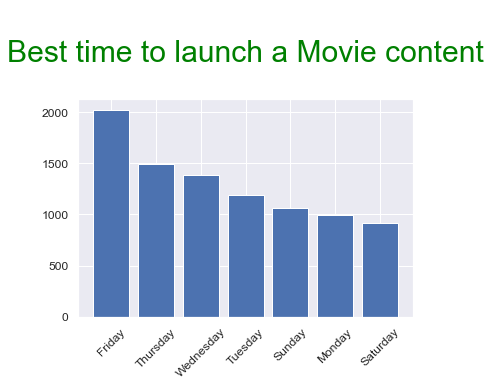

In [58]:
plt.bar(df.groupby(df_movie["date_added"].dt.day_name())["title"].nunique().sort_values(ascending=False).index,
df.groupby(df_movie["date_added"].dt.day_name())["title"].nunique().sort_values(ascending=False))
plt.xticks(rotation = 45)
plt.title("\nBest time to launch a Movie content\n", fontsize=30, color="green")
plt.show()

<B>Observation:</B>  
- Friday is the best day to release content
- Thrusday can be other alternative to release a content

### 9.14 - Creating a seperate DataFrame which would only comprise of TV Shows

In [59]:
df_tvshow = df[df['type'] == 'TV Show'].reset_index().drop(columns=['index'])
df_tvshow['duration_time'] =  df_tvshow['duration'].apply(lambda x : int(x.split(" ")[0]))

In [60]:
df_tvshow['date_added'] = pd.to_datetime(df['date_added'])

#### Chart 1 - Distribution of TV Show duration in seasons

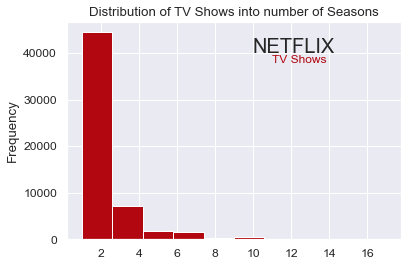

In [61]:
df_tvshow['duration_time'].plot(kind='hist',color='#b20710',title = "Distribution of TV Shows into number of Seasons")
plt.annotate("NETFLIX",xy=(10,40000),fontsize=20)
plt.annotate("TV Shows",xy=(11,38000),fontsize=12,color='#b20710')
plt.show()

#### Chart 2 - Number of TV Shows released per year over the last 30 years

In [62]:
df_tvshow['release_year'] = df_tvshow['release_year'].apply(lambda x : int(x))
df_tvshw_year = df_tvshow.groupby('release_year').count()['show_id'].to_frame().reset_index()

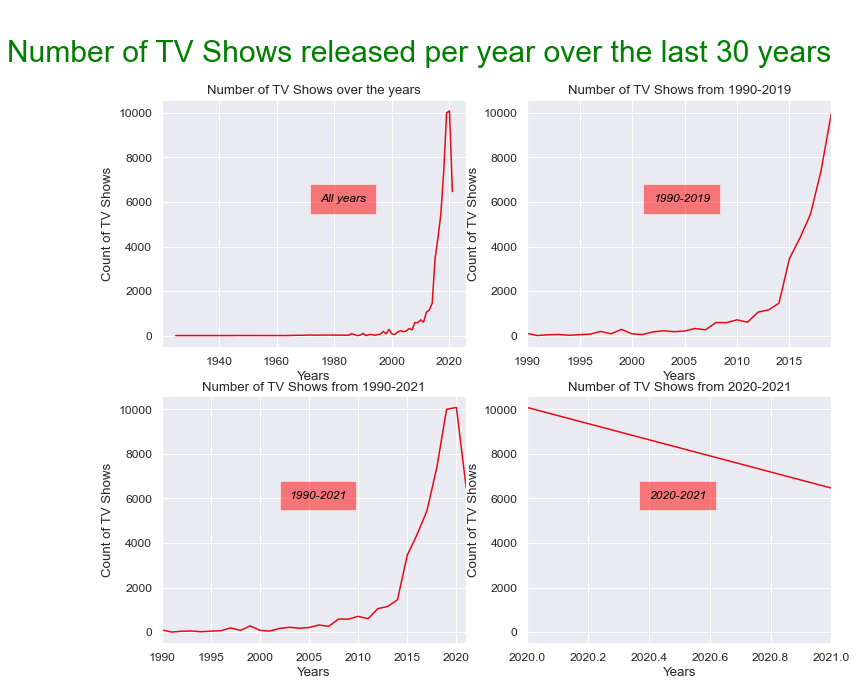

In [63]:
fig_movies = plt.figure(figsize=(12,10))
ax_mov = fig_movies.add_subplot(221)
ax_mov.plot( df_tvshw_year['release_year'], df_tvshw_year['show_id'],color="#e50914")
ax_mov.set_xlabel("Years")
ax_mov.set_ylabel("Count of TV Shows")
ax_mov.set_title("Number of TV Shows over the years")
ax_mov.annotate("All years",xy = (1975,6000),fontsize=12,
                color='black',style= 'italic',
                bbox=
                {'facecolor': 'Red', 'alpha': 0.5, 'pad': 10})

ax_mov1 = fig_movies.add_subplot(222)
ax_mov1.plot( df_tvshw_year['release_year'], df_tvshw_year['show_id'],color="#e50914")
ax_mov1.set_xlabel("Years")
ax_mov1.set_ylabel("Count of TV Shows")
ax_mov1.set_title("Number of TV Shows from 1990-2019")
ax_mov1.set_xlim(1990,2019)
ax_mov1.annotate("1990-2019",xy = (2002,6000),fontsize=12,
                color='Black',style= 'italic',
                bbox=
                {'facecolor': 'Red', 'alpha': 0.5, 'pad': 10})

plt.title("\nNumber of TV Shows released per year over the last 30 years\n", fontsize=30, color="green",loc="right")

ax_mov2 = fig_movies.add_subplot(223)
ax_mov2.plot( df_tvshw_year['release_year'], df_tvshw_year['show_id'],color="#e50914")
ax_mov2.set_xlabel("Years")
ax_mov2.set_ylabel("Count of TV Shows")
ax_mov2.set_title("Number of TV Shows from 1990-2021")
ax_mov2.set_xlim(1990,2021)
ax_mov2.annotate("1990-2021",xy = (2003,6000),fontsize=12,
                color='Black',style= 'italic',
                bbox=
                {'facecolor': 'Red', 'alpha': 0.5, 'pad': 10})

ax_mov3 = fig_movies.add_subplot(224)
ax_mov3.plot( df_tvshw_year['release_year'], df_tvshw_year['show_id'],color="#e50914")
ax_mov3.set_xlabel("Years")
ax_mov3.set_ylabel("Count of TV Shows")
ax_mov3.set_title("Number of TV Shows from 2020-2021")
ax_mov3.set_xlim(2020,2021)
ax_mov3.annotate("2020-2021",xy = (2020.4,6000),fontsize=12,
                color='Black',style= 'italic',
                bbox=
                {'facecolor': 'Red', 'alpha': 0.5, 'pad': 10})

plt.show()

Observation

We can certainly see a huge reduction of movies released in the recent couple of years. This is attributed to the ongoing pandemic which has affected all our lives.
The surprising observation is that the number of movies released reduced even in the year 2019 which was pre-pandemic.

#### Chart 3 - The top 10 countries that have produced most content in Netflix

In [64]:
all_countries = []
for i in df_tvshow['country']:
    for j in range(len(i)):
        all_countries.append(i)

In [65]:
df_top10_countries_tvshw = pd.Series(all_countries).value_counts()[:11]
df_top10_countries_tvshw

United States     174837
United Kingdom     61012
South Korea        41294
Unknown            39879
Japan              25370
Canada             13062
Mexico             12108
Taiwan             10314
Colombia           10272
France              9882
Australia           9369
dtype: int64

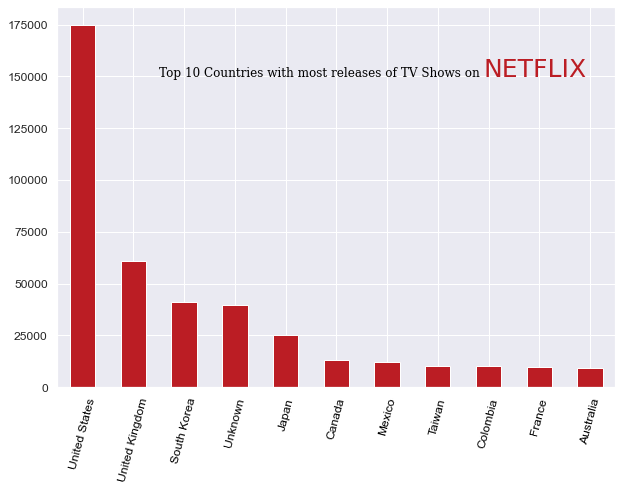

In [66]:
df_top10_countries_tvshw.plot(kind='bar',color = "#bb1d24",figsize=(10,7))
plt.annotate("Top 10 Countries with most releases of TV Shows on",xy=(1.5,150000),fontsize=12,
             color='black',fontfamily='serif')
plt.annotate("NETFLIX",xy=(7.9,150000),fontsize=25,
             color='#bb1d24',fontfamily='DejaVu Sans')
plt.xticks(rotation=75,color="black")
plt.show()

<B>Observations:</B>  
These are the <B>top 10 countries which have the most number of movies/shows produced</B>
- The number of content produced in USA is almost 3 times the sum of India which is the second largest content producer for Netflix.

#### Chart 4 - Distribution on the bases of age groups, and the countplot graph

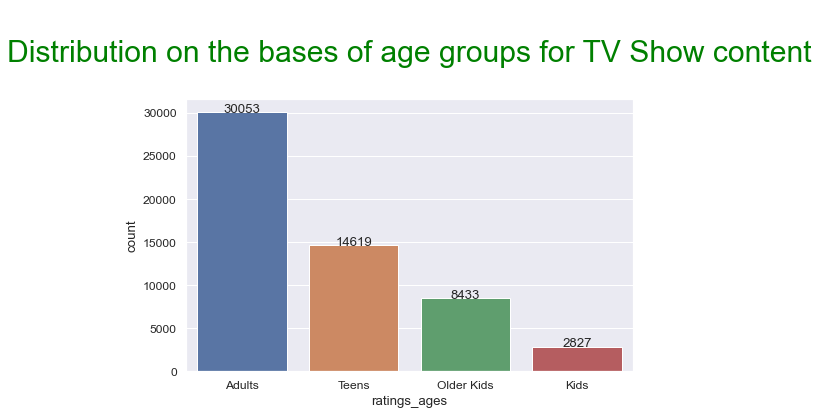

In [67]:
age_base_distribution = df_tvshow["ratings_ages"].value_counts()
age_base_distribution
age_base_distribution_in_percent = df_tvshow["ratings_ages"].value_counts(normalize=True)*100
age_base_distribution_in_percent

plt.figure(figsize=(8,5))

show_values_on_bars(sns.countplot(x = df_tvshow["ratings_ages"]))
plt.title("\nDistribution on the bases of age groups for TV Show content\n", fontsize=30, color="green")
plt.show()

<B>Observations:</B>
    - The TV show content abundantly is available for Adults
    
<B>Recommendations:</B>
    - Netflix should consider to add contents for Kids as well

#### Chart 5 - Best time to launch a content

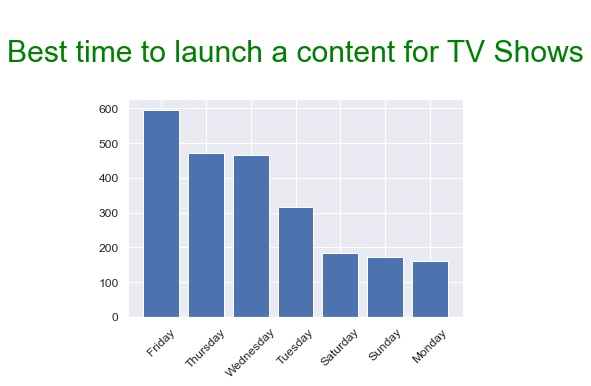

In [68]:
plt.bar(df.groupby(df_tvshow["date_added"].dt.day_name())["title"].nunique().sort_values(ascending=False).index,
df.groupby(df_tvshow["date_added"].dt.day_name())["title"].nunique().sort_values(ascending=False))
plt.xticks(rotation = 45)
plt.title("\nBest time to launch a content for TV Shows\n", fontsize=30, color="green")
plt.show()

<B>Observations:</B>  
    - Best days to release a TV Show is Friday
    - Other day that can be considered to release TV Show is Thursday

### 9.15 - Comparison TV show and Movies

In [69]:
df_movie_genre10 = df_movie.explode('genre')['genre'].value_counts()[:10].reset_index()
df_tvshow10_genre = df_tvshow.explode('genre')['genre'].value_counts()[:10].reset_index()

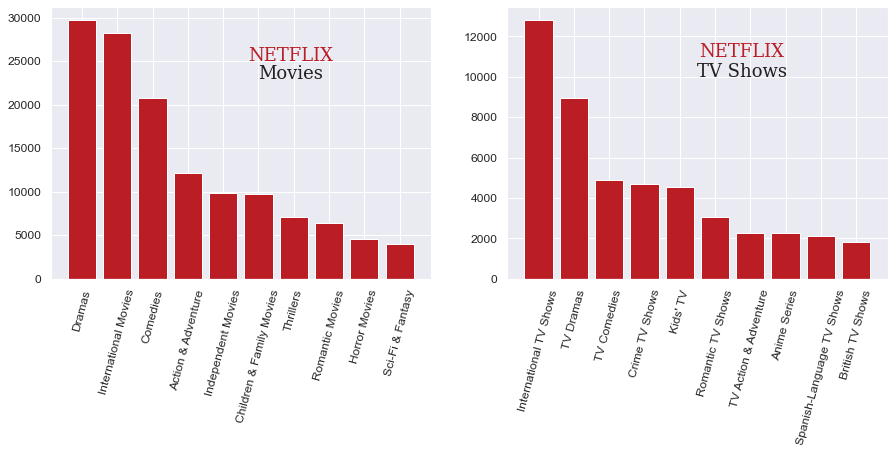

In [70]:
fig_new = plt.figure(figsize=(15,5))
ax_new = fig_new.add_subplot(121)
ax_new.bar(df_movie_genre10['index'],df_movie_genre10['genre'],color="#bb1d24")
ax_new1 = fig_new.add_subplot(122)
ax_new1.bar(df_tvshow10_genre['index'],df_tvshow10_genre['genre'],color="#bb1d24")
ax_new.set_xticklabels(list(df_movie_genre10['index']),rotation=75)
ax_new1.set_xticklabels(list(df_tvshow10_genre['index']),rotation=75)
ax_new.annotate("NETFLIX",xy=(4.7,25000),fontsize=18,color='#bb1d24',fontfamily='serif')
ax_new.annotate("Movies",xy=(5,23000),fontsize=18,color='#221f1f',fontfamily='serif')
ax_new1.annotate("NETFLIX",xy=(4.55,11000),fontsize=18,color='#bb1d24',fontfamily='serif')
ax_new1.annotate("TV Shows",xy=(4.5,10000),fontsize=18,color='#221f1f',fontfamily='serif')
plt.show()

In [71]:
df_exp_genre[df_exp_genre['genre'] == "Anime Series"]['rating'].value_counts()

TV-MA    899
TV-14    853
TV-Y7    298
TV-PG    210
TV-Y      13
Name: rating, dtype: int64

<B>Observation:</B>

The first 3 categories are same in both Movies and Tv shows
The one standout in the above plots are "Anime". Although Anime movie genre did not make the cut in "Movies" it certainly did in "TV shows".  

<B>Inference:</B>

People enjoy watching Anime as a series over movies.

Although there is a pre set notion that Anime is usually for kids. We can see that the rating for "TV-MA" is almost around "TV-14" indicating that Anime is best enjoyed both by kids above 14 and mature adults.

<B>Recommendation to Netflix:</B>

Produce or onboard more Anime Series of rating TV-14/TV_MA on Netflix.
### 9.16 - The highest rating TV Shows or Movies.

A bidirectional bar chart here to show the comparison between the TV shows and Movies vs Ratings. Creating two different bar charts one for TV Show and another for Movie doesn’t make sense but combining a user can easily understand the difference.

In [72]:
# making a copy of df
dff = df.copy()
# making 2 df one for tv show and another for movie with rating 
df_tv_show = dff[dff['type']=='TV Show'][['rating', 'type']].rename(columns={'type':'tv_show'})
df_movie = dff[dff['type']=='Movie'][['rating', 'type']].rename(columns={'type':'movie'})
df_tv_show = pd.DataFrame(df_tv_show.rating.value_counts()).reset_index().rename(columns={'index':'tv_show'})
df_tv_show['rating_final'] = df_tv_show['rating'] 
# making rating column value negative
df_tv_show['rating'] *= -1
df_movie = pd.DataFrame(df_movie.rating.value_counts()).reset_index().rename(columns={'index':'movie'})

In [73]:
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_yaxes=True, horizontal_spacing=0)

# bar plot for tv shows
fig.append_trace(go.Bar(x=df_tv_show.rating, y=df_tv_show.tv_show, orientation='h', showlegend=True, 
                        text=df_tv_show.rating_final, name='TV Show', marker_color='#221f1f'), 1, 1)

# bar plot for movies
fig.append_trace(go.Bar(x=df_movie.rating, y=df_movie.movie, orientation='h', showlegend=True, text=df_movie.rating,
                        name='Movie', marker_color='#b20710'), 1, 2)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(title='Which has the highest rating TV shows or Movies?',
                  margin=dict(t=80, b=0, l=70, r=40),
                  hovermode="y unified", 
                  xaxis_title=' ', yaxis_title=" ",
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                  hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))

Here for the bi-directional chart, we will make 2 different data frames one for Movies and another one for TV Shows having ratings in them.

We are making 2 subplots and they are sharing the y-axis.

<B>Observations:</B>
- 72.3% people prefer Movies over TV Shows on Netflix.Large number of people watch TV-MA rating  Movies which are for mature audience.
- 27.7% people prefer TV Shows on Netflix. There is no inappropriate content for ages 17 and under in TV Shows.
#### Chart 1 - Distribution of Rating and finding what audience prefer to watch
To know which type of content is most watched by the audience so that Netflix can decide what type of content to be released next. It helps Netflix to understand the most and least favourite content watched by an audience.

In [74]:
df_rating = pd.DataFrame(df['rating'].value_counts()).reset_index().rename(columns={'index':'rating','rating':'count'})

fig_bar = px.bar(df_rating, y='rating', x='count', title='Distribution of Rating',

color_discrete_sequence=['#b20710'], text='count')

fig_bar.update_xaxes(showgrid=False)

fig_bar.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)

fig_bar.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))

fig_bar.update_layout(margin=dict(t=80, b=0, l=70, r=40),

hovermode="y unified",

xaxis_title=' ', yaxis_title=" ", height=400,

plot_bgcolor='#333', paper_bgcolor='#333',

title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),

font=dict(color='#8a8d93'),

legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),

hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif")) 

<B>Observations:</B>
- Maximum rated content by Audience is TV-MA and TV-14
#### Chart 2 - the impact of Netflix TV Shows or Movies over the years by comparing both.

In [75]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]
col = "year_added"
vc1 = d1[col].value_counts().reset_index().rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)
vc2 = d2[col].value_counts().reset_index().rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)
trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="orange"), )
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#b20710"))
data = [trace1, trace2]
fig_line = go.Figure(data)
fig_line.update_traces(hovertemplate=None)
fig_line.update_xaxes(showgrid=False)
fig_line.update_yaxes(showgrid=False)
large_title_format = 'Tv Show and Movies impact over the Year'
small_title_format = "Due to Covid updatation of content is slowed." 
fig_line.update_layout(title=large_title_format + " " + small_title_format, 
    height=400, margin=dict(t=130, b=0, l=70, r=40), 
    hovermode="x unified", xaxis_title=' ', 
    yaxis_title=" ", plot_bgcolor='#333', paper_bgcolor='#333', 
    title_font=dict(size=25, color='#8a8d93',
    family="Lato, sans-serif"),
    font=dict(color='#8a8d93'),
    legend=dict(orientation="h",
    yanchor="bottom",
    y=1,
    xanchor="center",
    x=0.5)) 
 
fig_line.show()

After the year 2019 covid came that badly affects Netflix for producing content. Movies have exponential growth from the start but due to covid, it is going downwards.

- Highest number of Tv Shows were released in 2019 followed by 2017.
- Highest number of Movies were relased in 2019 followed by 2020
#### Chart 3 - If a producer wants to release a show which month is the best month to release it.

The reason for plotting the chart

The best month to release content so the producer can gain much revenue. Most of the holidays came in December month so to releases a Movie or TV show in December is the best way to earn a lot of profit as the whole family will be spending time with each other and watching shows.

In [76]:
df_month = pd.DataFrame(df.month_added.value_counts()).reset_index().rename(columns={'index':'month','month_added':'count'})
# converting month number to month name
df_month['month_added'] = df_month['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
df_month[:2]

month  count month_added
0      7  20276        July
1      1  18252         Jan

In [77]:
fig_month = px.funnel(df_month, x='count', y='month_added', title='Best month for releasing Content',
                      height=350, width=600, color_discrete_sequence=['#b20710'])
fig_month.update_xaxes(showgrid=False, ticksuffix=' ', showline=True)
fig_month.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_month.update_layout(margin=dict(t=60, b=20, l=70, r=40),
                        xaxis_title=' ', yaxis_title=" ",
                        plot_bgcolor='#333', paper_bgcolor='#333',
                        title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                        font=dict(color='#8a8d93'),
                        hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))

Ending and starting of the year January and July is the best month to release content. The best 4 months to release content are July, January, October, and November.

### 9.17 - Netflix India

In [78]:
df_india = df[df['country'] == 'India'].reset_index().drop(columns=['index'])
df_india.head()

show_id director            cast country                   genre     type  \
0      s5  Unknown      Mayur More   India  International TV Shows  TV Show   
1      s5  Unknown      Mayur More   India       Romantic TV Shows  TV Show   
2      s5  Unknown      Mayur More   India             TV Comedies  TV Show   
3      s5  Unknown  Jitendra Kumar   India  International TV Shows  TV Show   
4      s5  Unknown  Jitendra Kumar   India       Romantic TV Shows  TV Show   

          title          date_added  release_year rating   duration  \
0  Kota Factory  September 24, 2021          2021  TV-MA  2 Seasons   
1  Kota Factory  September 24, 2021          2021  TV-MA  2 Seasons   
2  Kota Factory  September 24, 2021          2021  TV-MA  2 Seasons   
3  Kota Factory  September 24, 2021          2021  TV-MA  2 Seasons   
4  Kota Factory  September 24, 2021          2021  TV-MA  2 Seasons   

  ratings_ages  duration_in_minutes  seasons  year_added  day_added  \
0       Adults                    0        2        2021         24   
1       Adults                    0        2        2021         24   
2       Adults                    0        2        2021         24   
3       Adults                    0        2        2021         24   
4       Adults                    0        2        2021         24   

   month_added  weekday_added  is_weekend_added  
0            9              4                 0  
1            9              4                 0  
2            9              4                 0  
3            9              4                 0  
4            9              4                 0

#### 9.17.1 Top directors in India

In [79]:
top_10_directors_India = df_india.groupby(['country','director'])['title'].count().reset_index()
top_10_directors_India[top_10_directors_India['country'] == 'India'].sort_values('title', ascending=False).head(10)

country            director  title
684   India             Unknown    995
151   India        David Dhawan    270
80    India      Anurag Kashyap    219
168   India    Dibakar Banerjee    192
617   India  Sooraj R. Barjatya    180
735   India         Zoya Akhtar    168
682   India         Umesh Mehra    162
478   India     Ram Gopal Varma    158
427   India        Priyadarshan    156
255   India         Karan Johar    155

In [80]:
india_director = []
for i in df_india['director']:
    for j in range(len(i)):
        india_director.append(i)       

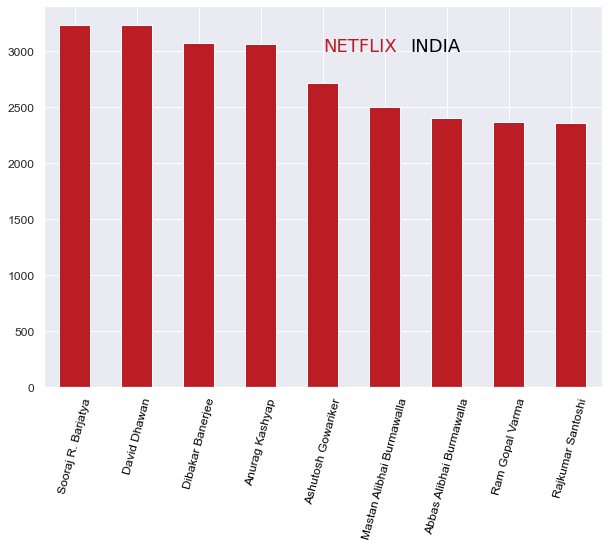

In [81]:
pd.Series(india_director).value_counts()[1:10].plot(kind='bar',color = "#bb1d24",figsize=(10,7))
plt.annotate("NETFLIX",xy=(4,3000),fontsize=18,
             color='#bb1d24',fontfamily='DejaVu Sans')
plt.annotate("INDIA",xy=(5.4035,3000),fontsize=18,
             color='black',fontfamily='DejaVu Sans')
plt.xticks(rotation=75,color="black")
plt.show()

<B>Observation:</B>
- Sooraj R Barjatya has maximum number of records in the dataset
- David Dhawan and Anurag Kashyap have maximum number of records under titles
#### 9.17.2 Top actors in India

In [82]:
top_10_actors_India = df_india.groupby(['country','cast'])['title'].count().reset_index()
top_10_actors_India[top_10_actors_India['country'] == 'India'].sort_values('title', ascending=False).head(10)

country              cast  title
383    India       Anupam Kher    113
3023   India    Shah Rukh Khan     98
3610   India           Unknown     97
2029   India  Naseeruddin Shah     95
151    India      Akshay Kumar     87
2447   India      Radhika Apte     86
2229   India      Paresh Rawal     85
223    India  Amitabh Bachchan     85
2179   India           Om Puri     79
1474   India    Kareena Kapoor     76

In [83]:
india_cast = []
for i in df_india['cast']:
    for j in range(len(i)):
        india_cast.append(i)

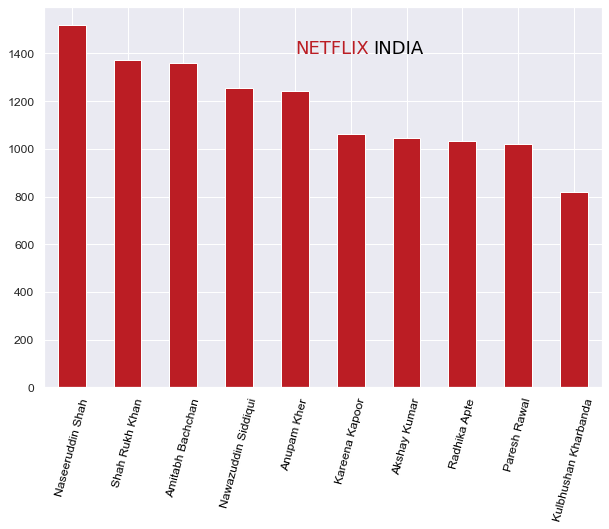

In [84]:
pd.Series(india_cast).value_counts()[:10].plot(kind='bar',color = "#bb1d24",figsize=(10,7))
plt.annotate("NETFLIX",xy=(4,1400),fontsize=18,
             color='#bb1d24',fontfamily='DejaVu Sans')
plt.annotate("INDIA",xy=(5.4035,1400),fontsize=18,
             color='black',fontfamily='DejaVu Sans')
plt.xticks(rotation=75,color="black")
plt.show()

##### 9.17.2.1 Taking the last 10 years of data for actor

<B>Observation:</B> The top casts in India Netflix are as shown above.

<B>Inference:</B> They are ubdoubtedly marquee actors who draws a large attention from the fans.

<B>Recommendation:</B> Netflix should produce an original content movie roping in multiple people from this list. With the huge fan following that these people have, it would surely translate to more subscribers joining Netflix to see their beloved actors newest releases.

<B>Taking the last 10 years data of Indian Movies data</B>

In [85]:
df_india_recent_mov = df_india[(df_india['release_year'] > 2011) & (df_india['type'] == 'Movie')].reset_index().drop(columns=['index'])

In [86]:
india_cast_recent_mov = []
for i in df_india_recent_mov['cast']:
    for j in range(len(i)):
        india_cast_recent_mov.append(i)

Plotting the top 10 actors in recent Years

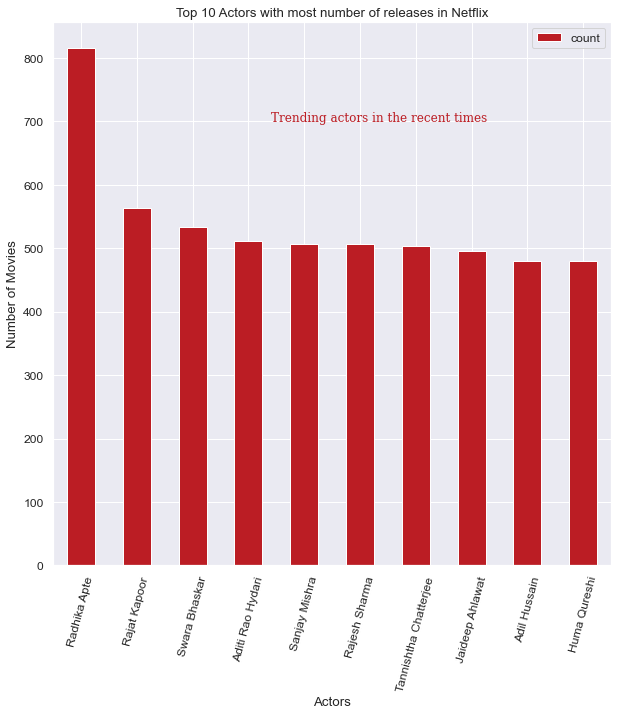

In [87]:
pd.Series(india_cast_recent_mov).value_counts()[1:].to_frame()[:10].rename(columns = {0:"count"}).plot(kind='bar',figsize = (10,10),
                                                                                                       ylabel ='Number of Movies',
                                                                                                       xlabel = "Actors",
                                                                                                       title = "Top 10 Actors with most number of releases in Netflix",
                                                                                                       color = '#bb1d24',
                                                                                                       rot = 75)
plt.annotate("Trending actors in the recent times",xy=(3.4,700),fontsize=12,
             color='#bb1d24',fontfamily='serif')

plt.show()

Observation : Radhika Apte, Rajat Kapoor & Swara Bhaskar are some of the actors who are all time favourites from 2011

Observation : The graph shows us the trend of actors over the last 10 years.

- Radhika Apte is an actor who has been consistently trending since the last 10 years.
- Rajat Kapoor is one such actor who has been in the limelight since the last couple of years.

#### 9.17.3 Genre trends in India

In [88]:
india_genre_recent_mov = []
for i in df_india_recent_mov['genre']:
    for j in range(len(i)):
        india_genre_recent_mov.append(i)    

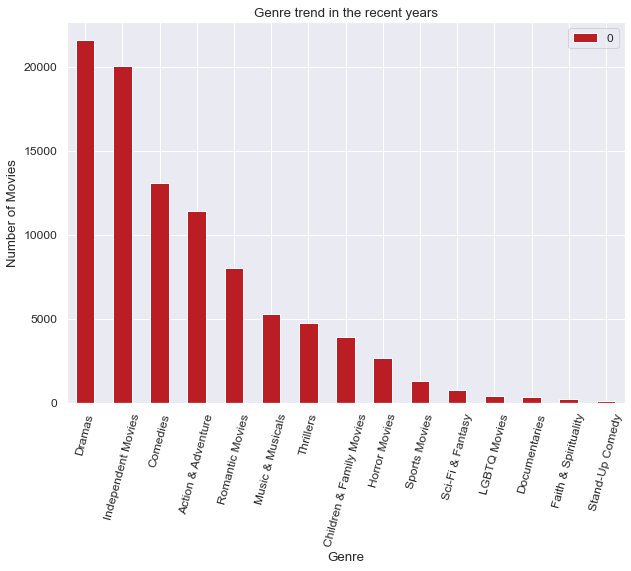

In [89]:
pd.Series(india_genre_recent_mov).value_counts()[1:].to_frame().plot(kind='bar',figsize = (10,7),
                                                      ylabel ='Number of Movies',
                                                      xlabel = "Genre",
                                                      title = "Genre trend in the recent years",
                                                      color = '#bb1d24',
                                                      rot = 75)
plt.show()

<B>International Movies</B> does not denote the genre of the movie rather it signifies that the movie has been made outside of USA, so ignoring/dropped the column  

<B>Observation:</B>  
- Dramas, Independent Movies and Comedies are India's most famous genres.  
#### 9.17.4 Rating vs Release Year

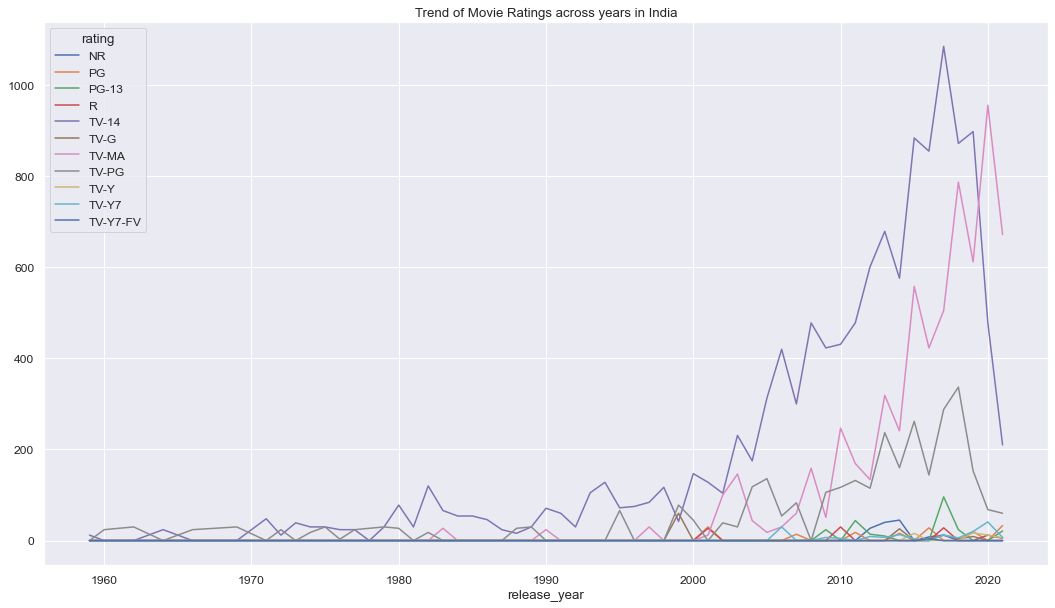

In [90]:
pd.crosstab(df_india['release_year'],df_india['rating']).plot(figsize=(18,10),title="Trend of Movie Ratings across years in India")
plt.show()

<B>Inference:</B> India's choice for movies has always been "TV-14" (unsuitable for children under 14 years of age) rated since around the 1980s. This choice does not come as a surprise since India being a Familialistic nation would naturally want to watch movies as a Family which includes everyone from children to grandparents without any explicit content.
However, it is surprising to see a slight change in the Movie/TV show trends since the pandemic started. Of course, there has been a significant overall reduction in the number of movies rolled out since the pandemic, but the decline in "TV-14" rated shows is more strong compared to the "TV-MA" rated shows. This has supposedly got to be associated with the behavioral change that has been inflicted upon us since lockdowns started. People have probably started to watch movies individually rather not as a Family or group which has led to a lesser decline in movies meant for mature adults.

**Recommendation:** Netflix should add more movies that are "TV-MA" and "TV-14" rated.

# **Recommendation Based on Insights gathered:**

1. Netflix should focus on adding content to the platform which is released in the recent past, instead of adding old content.
**Source insights:** 9.1(observation 1), 9.8 (observations 1 and 2)

2. Netflix should add movies to its platform which are produced preferably in the United States, India, United Kingdom, Canada, and France.
**Source insights:** 9.1(observation 6), 9.3

3. Netflix should add tv shows to its platform which are produced preferably in the United States, United Kingdom, and Japan. South Korea and Canada.
**Source insights:** 9.1(observation 6), 9.3

4. Netflix should add tv shows to its platform which are produced preferably for mature audiences only. And they should add movies to their platform which are produced preferably for audiences aged 14 or more.
**Source insights:** 9.2, 9.9(observations 7 and 8)

5. Netflix should focus on adding content to their platform which preferably falls under the categories of, International movies/tv shows, Drama, and Comedy.
**Source insights:** 9.4, 9.9(observations 5 and 6)

6. Netflix should collaborate with the following actor-director duos to produce content for Netflix.
Anupam Kher, David Dhawan
Samuel Jackson, Jay Karas
Takahiro Sakurai, Kazuya Murata
David Attenborough, Stan Lathan
**Source insights:** 9.5(observation 1 and 2), 9.6(observation 1 and 2), 9.9(observations 1,2,3 and 4)

7. Netflix should preferably add new movies or tv shows on the 1st or 15th day of the month.
**Source insights:** 9.7(observation 2), 9.8(observation 5), 9.10(observation 2)

8. Along with the average length of feature films, Netflix should also add short films to its platform.
**Source insights:** 9.12(observation: 2)

9. Movies and TV shows are generally available for adult group age, Netflix should collaborate with producers from Japan as they have expertise in Anime and produce content for younger age groups too
Source insights: 9.13(Chart 4. Anime Series), 9.13(Chart 6), 9.14(Chart 4)

10. India's choice for movies has always been "TV-14" (unsuitable for children under 14 years of age) rated since around the 1980s. This choice does not come as a surprise since India being a Familialistic nation would naturally want to watch movies as a Family which includes everyone from children to grandparents without any explicit content.
However, it is surprising to see a slight change in the Movie/TV show trends since the pandemic started. Of course, there has been a significant overall reduction in the number of movies rolled out since the pandemic, but the decline in "TV-14" rated shows is more strong compared to the "TV-MA" rated shows. This has supposedly got to be associated with the behavioral change that has been inflicted upon us since lockdowns started. People have probably started to watch movies individually rather not as a Family or group which has led to a lesser decline in movies meant for mature adults.

**Recommendation:** Netflix should add more movies that are "TV-MA" and "TV-14" rated.

Source insights: 9.17 (9.17.3 and 9.17.4)